---

*Thesis on Breast Cancer Wisconsin Dataset*
---
#### Academic year: 2019/2020
#### Course: Mathematics in Machine Learning
#### Student: Cappelli Mattia s278421

---



# Table of contents

* [Data Description](#chapter1)

* [Strtified Splitting](#chapter2)
    
* [Outliers Detection](#chapter3)
    * [IQR](#section_3_1)
    * [Z-Score](#section_3_2)

* [Standardization and Normalization](#chapter4)
    * [Standard Scaler](#section_4_1)
    * [Min Max Scaler](#section_4_2)

* [Correlation Analysis](#chapter5)
    
* [Feature Selection and Trees](#chapter6)
    * [Decision Tree](#section_6_1)
    * [Random Forest](#section_6_2)    
    * [Feature Importance](#section_6_3)
    
* [DIMENSIONALITY REDUCTION: PCA](#chapter7)
    
* [REBALANCING](#chapter8)
    * [Oversampling: SMOTE](#section_8_1)
    * [Undersampling: RendomUnderSampler](#section_8_2)    
    * [Combined Sampling](#section_8_3)

* [Strtified K-Fold](#chapter9)
    
* [Evaluation Matrics](#chapter10)
    
* [Model Selection](#chapter11)
    * [Logistic Regression](#section_11_1)
    * [SVM](#section_11_2)
    * [Decision Tree](#section_11_3)
    * [Bagging and Random Forest](#section_11_4)
    * [Boosting: AdaBoost](#section_11_5)
* [Conclusions](#chapter12)

* [References](#chapter13)



In [1]:
import sys
import plotly.io as pio
from IPython.display import Javascript
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score,f1_score,accuracy_score,confusion_matrix
import math
import numpy as np
from sklearn.datasets import load_breast_cancer
import pandas as pd
import seaborn as sns
from matplotlib import pyplot
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.graph_objects as go
import sklearn
from sklearn.preprocessing import StandardScaler, LabelEncoder, Normalizer, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score, GridSearchCV,train_test_split
from sklearn.tree import DecisionTreeClassifier
from scipy import stats
from sklearn.svm import SVC,LinearSVC
from sklearn.linear_model import LogisticRegression
import warnings
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from mlxtend.plotting import plot_confusion_matrix
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di 
pio.renderers.default = 'notebook_connected'
pio.templates.default = "plotly_white"
warnings.filterwarnings('ignore')
rs=42

In [2]:
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Show/hide code</button>''', raw=True)

class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

Show/hide code

# Data Description<a class="anchor" id="chapter1"></a>


The breast cancer Wisconsin data set is used for this analysis. They describe characteristics of the cell nuclei present in the image.
The problem releted to this dataset is to determine whether or not the patient has breast cancer,taking into account the features of the dataset.

We are in front of a binary classification problem.

**Data Set Characteristics:**

Number of Instances: 569

Number of Attributes: 30 numeric, predictive attributes and the class
- radius (mean of distances from center to points on the perimeter)
- texture (standard deviation of gray-scale values)
- perimeter     
- area
- smoothness (local variation in radius lengths)
- compactness (perimeter^2 / area - 1.0)
- concavity (severity of concave portions of the contour)
- concave points (number of concave portions of the contour)
- symmetry
- fractal dimension ("coastline approximation" - 1)

The mean, standard error, and "worst" or largest (mean of the three
worst/largest values) of these features were computed for each image,
resulting in 30 features.  For instance, field 0 is Mean Radius, field
10 is Radius SE, field 20 is Worst Radius.

Class:
- Malignant-212
- Benign-357

Missing Attribute Values: None for each attribute

Features are computed from a digitized image of a fine needle
aspirate (FNA) of a breast mass.  They describe
characteristics of the cell nuclei present in the image.
Below we can see part of the dataset to have an idea of the structure.



In [67]:
df,y = load_breast_cancer(return_X_y=True,as_frame=True)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Descriptive statistics:<a class="anchor" id="section_1_2"></a>

In [4]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [69]:
df = load_breast_cancer()

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [79]:
df2=df.copy()
df2['diagnosis']=y
df2

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


## KDE
Now we can represent the approximative distribution of each feature using the kernel density estimation that is a non-parametric way to estimate the probability density function of a random variable.
>Let (x1, x2, …, xn) be a sample drawn from some distribution with an unknown density $ƒ$. We are interested in estimating the shape of this function $ƒ$. Its kernel density estimator is
${\displaystyle {\widehat {f}}_{h}(x)={\frac {1}{n}}\sum _{i=1}^{n}K_{h}(x-x_{i})={\frac {1}{nh}}\sum _{i=1}^{n}K{\Big (}{\frac {x-x_{i}}{h}}{\Big )}}$

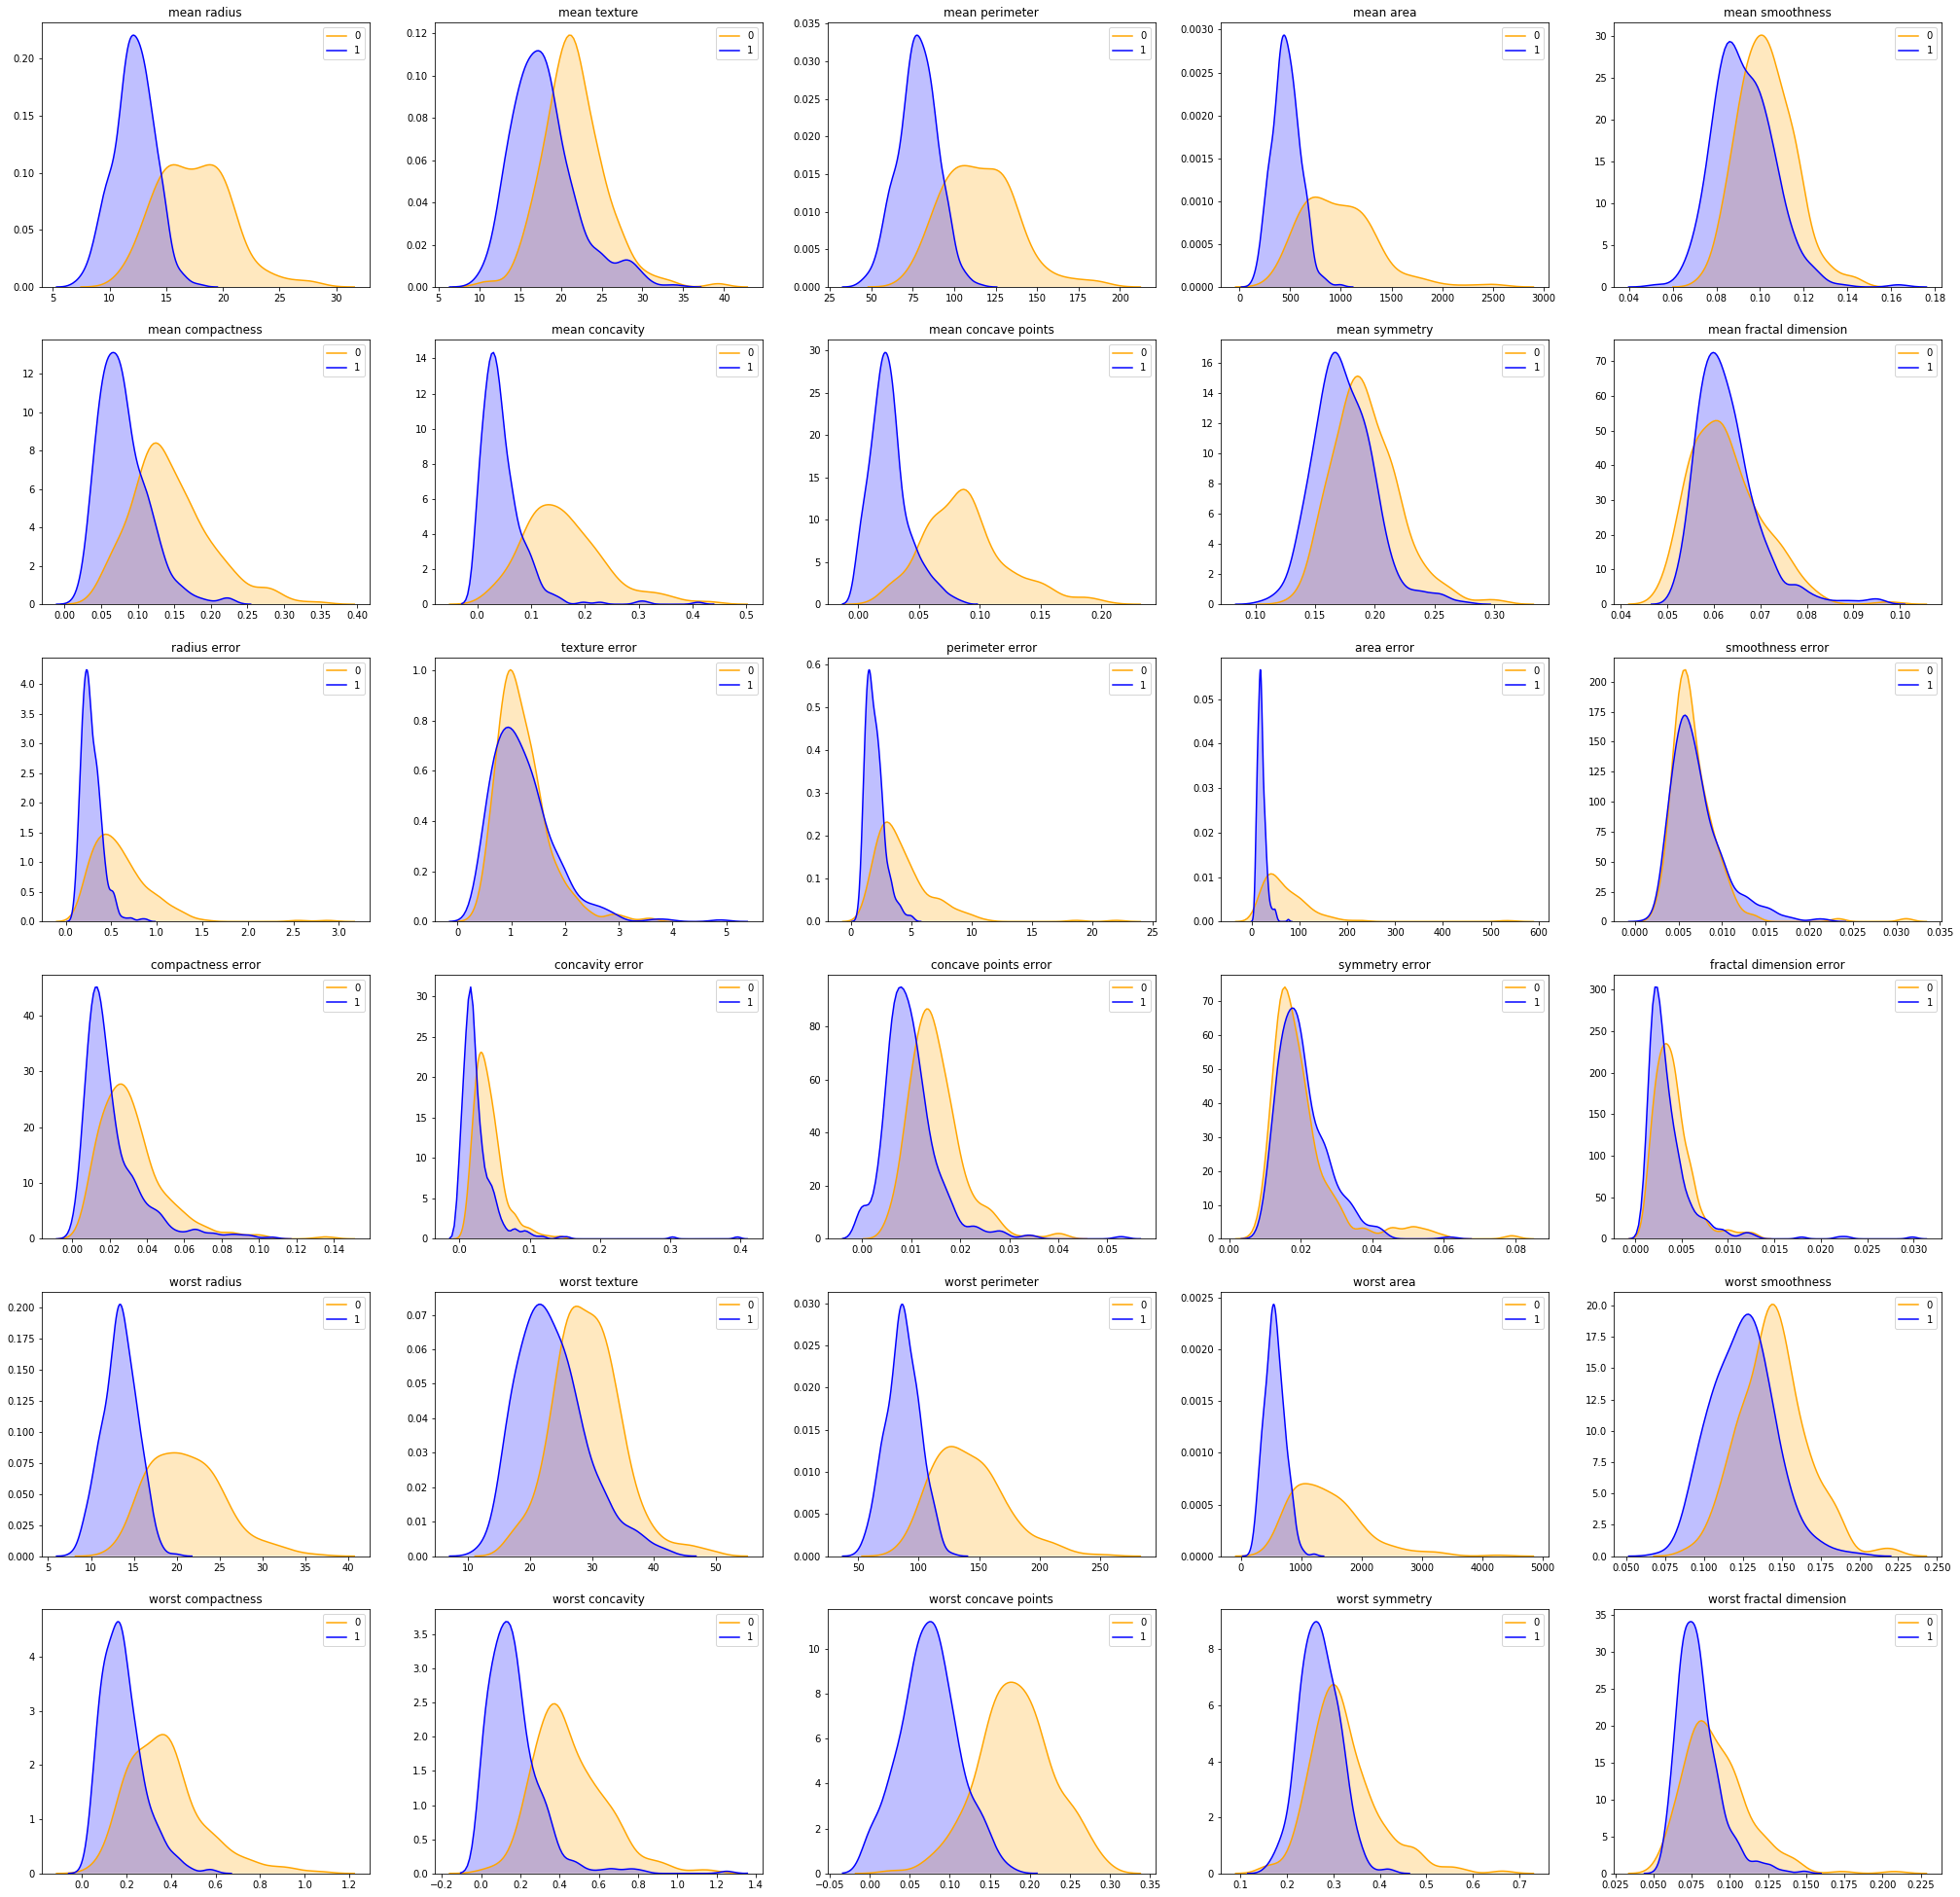

In [103]:
df2=df.copy()
mean_col = list(df.columns)
df2['diagnosis']=y
f, axes = plt.subplots(6,5,figsize=[35,35])
indexes=[]
for i in range(6):
  for j in range(5):
    t=(i,j)
    indexes.append(t)
for el,i in zip(mean_col,indexes):
  sns.kdeplot(df2.loc[(df2['diagnosis']==0), 
              el], color='orange', shade=True, Label=0,ax=axes[i[0],i[1]]) 
  sns.kdeplot(df2.loc[(df2['diagnosis']==1),  
              el], color='b',shade=True, Label=1,ax=axes[i[0],i[1]]) 
  axes[i[0],i[1]].set_title(el)

# Stratified splitting <a class="anchor" id="chapter2"></a>
The first step to do before the processing or the transformation of the data, it's to divide the dataset in training and test set. This procedure is significant because we can't access or visualize the test set to simulate a real study case. Indeed we can fit or train our models only on the training set.
This split is done in such a way to preserve the original distribution of the data. This method is called stratified split and we will use again in the training procedure for the validation task. The samples in the two sets are also shuffled. The split rate is set to 0.25, this means that 25% of the examples are in the test set and the others in the training set.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df,y,test_size = 0.25, stratify = y, random_state = 42)

In [6]:
fig = make_subplots(rows=1, cols=3)
fig.add_trace(go.Bar(name='initial distribution',
   y = y.value_counts().sort_index(),
   x = ['Malignant','Benign'],
   texttemplate=[f'{y.value_counts().sort_index()[0]}',f'{y.value_counts().sort_index()[1]}'], textposition='outside'),
   row=1, col=1
)

fig.add_trace(go.Bar(name='train-set distribution',
   y = y_train.value_counts().sort_index(),
   x = ['Malignant','Benign'],
   texttemplate=[f'{y_train.value_counts().sort_index()[0]}',f'{y_train.value_counts().sort_index()[1]}'], textposition='outside'),
   row=1, col=2
)

fig.add_trace(go.Bar(name='test-set distribution',
   y = y_test.value_counts().sort_index(),
   x = ['Malignant','Benign'],
   texttemplate=[f'{y_test.value_counts().sort_index()[0]}',f'{y_test.value_counts().sort_index()[1]}'], textposition='outside'),
   row=1, col=3
)
fig.update_layout(height=550, width=800, title_text="Dataset distributions")
fig.show()

This bar plots show the distribution  that is the same for each set of data

In [7]:
import plotly.graph_objects as go
N = len(X_train.columns)
c = ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 360, N)]
fig = go.Figure()
for i,el in enumerate(X_train.columns):
  fig.add_trace(go.Box(
      y=X_train[el],
      name=el,
      boxpoints='outliers', 
      marker_color=c[i],
      line_color=c[i]
  ))
fig.update_layout(title_text="Features Distribution")
fig.show()

# Outliers Detection <a class="anchor" id="chapter3"></a>
During a data set inspection a very important task is to identify the outliers. An outlier can be a result of a mistake during data collection or it can be just an indication of variance in the data. We can simply visualize the ouliers through the boxplot that represent a univariate outliers analysis for each feature. The outliers can badly affect the model during the training phase. 

In the following sections we will see the outliers detection using the IQR method and the Z-score 

## IQR<a class="anchor" id="section_3_1"></a>
>The interquartile range (IQR), also called the midspread or middle 50%, or technically H-spread, is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles. It is a measure of the dispersion similar to standard deviation or variance, but is much more robust against outliers.

IQR = Q3 − Q1.

The IQR represents the length in the box-plot. We consider an outlier any value that lies more than one and a half times the length of the box from either end of the box.
In other words if a data point is below Q1 – 1.5×IQR or above Q3 + 1.5×IQR, it is viewed as being too far from the central values to be reasonable.


In [8]:
def IQR(X_train,y_train,disp=False):
    Q1 = X_train.quantile(0.25)
    Q3 = X_train.quantile(0.75)
    IQR = Q3 - Q1
    X_train_out = X_train[~((X_train< (Q1 - 1.5* IQR)) |(X_train > (Q3 + 1.5 * IQR))).any(axis=1)]
    y_train_out=y_train[y_train.index.isin(X_train_out.index)]
    if disp:
        print(f'\tThe outliers removed are {X_train.shape[0]-X_train_out.shape[0]}, now the examples are {X_train_out.shape[0]}\n')
        print('This is the IQR for each feature:\n')
        print(IQR)
    return X_train_out,y_train_out
X_train_IQR,y_train_IQR=IQR(X_train,y_train,disp=True)

	The outliers removed are 134, now the examples are 292

This is the IQR for each feature:

mean radius                  4.112500
mean texture                 5.805000
mean perimeter              28.955000
mean area                  352.075000
mean smoothness              0.018745
mean compactness             0.066630
mean concavity               0.104455
mean concave points          0.054010
mean symmetry                0.033475
mean fractal dimension       0.008510
radius error                 0.237150
texture error                0.641725
perimeter error              1.635000
area error                  27.312500
smoothness error             0.002948
compactness error            0.019795
concavity error              0.028225
concave points error         0.007097
symmetry error               0.008558
fractal dimension error      0.002367
worst radius                 5.530000
worst texture                8.345000
worst perimeter             41.090000
worst area                 517.425

## Z-SCORE <a class="anchor" id="section_3_2"></a>
The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured.
While calculating the Z-score we re-scale and center the data and look for data points which are too far from zero. These data points which are way too far from zero will be treated as the outliers. A threshold of 3 is used in this case and if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.

$Z_{score} = \frac{(x -\mu)}{\sigma}$

In [9]:
def Z_score(X_train,y_train,disp=False):
    z = np.abs(stats.zscore(X_train))
    X_train_z = X_train[(z < 3).all(axis=1)]
    y_train_z = y_train[y_train.index.isin(X_train_z.index)]
    if disp:
        print(f'\tThe outliers removed are {X_train.shape[0]-X_train_z.shape[0]}, now the examples are {X_train_z.shape[0]}')
    return X_train_z,y_train_z
X_train_z,y_train_z=Z_score(X_train,y_train,disp=True)

	The outliers removed are 56, now the examples are 370


# Standardization and Normalization <a class="anchor" id="chapter4"></a>

Variables that are measured at different scales do not contribute equally to the analysis and might end up creating a bias. Transforming the data to comparable scales can prevent this problem. Typical procedures to equalize the range and/or data variability are the normalization or the standardization of the data.
The boxplots above represent the difference of scale between feature for example in the case of worst and mean area, so it's necessary to transform the data.

## Standard Scaler <a class="anchor" id="section_4_1"></a>
Standardize means changing the values so that the distribution is centered around 0, with a standard deviation of 1.

$z_{ij} = \frac{x_{ij} - \mu }{\sigma}$

After the standardization the features scale are all clearly comparable.
But a negative points is that StandardScaler cannot guarantee balanced feature scales in the presence of outliers, for this aim I removed first the outliers before standardize. The outliers have an influence when computing the empirical mean and standard deviation which shrinks the range of the feature values.


In [10]:
X_test_IQR=X_test.copy()
X_test_z=X_test.copy()
for el in X_train_IQR.columns:
  standardizer = StandardScaler()
  standardizer.fit(np.array(X_train_IQR[el]).reshape(-1, 1))
  X_train_IQR[el]=standardizer.transform(np.array(X_train_IQR[el]).reshape(-1, 1))
  X_test_IQR[el]=standardizer.transform(np.array(X_test_IQR[el]).reshape(-1, 1))
    
for el in X_train_z.columns:
  standardizer = StandardScaler()
  standardizer.fit(np.array(X_train_z[el]).reshape(-1, 1))
  X_train_z[el]=standardizer.transform(np.array(X_train_z[el]).reshape(-1, 1))
  X_test_z[el]=standardizer.transform(np.array(X_test_z[el]).reshape(-1, 1))

N = len(X_train_IQR.columns)
c = ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 360, N)]
fig = go.Figure()
for i,el in enumerate(X_train_IQR.columns):
  fig.add_trace(go.Box(boxpoints=False,
      y=X_train_IQR[el],
      name=el,
      marker_color=c[i],
      line_color=c[i]
  ))
fig.update_layout(title_text="Box Plot With Standar Scaler")
fig.show()

## Min Max Scaler <a class="anchor" id="section_4_2"></a>
Min Max Scaler is a type of normalization. The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values and without changing the shape of the distribution.

MinMaxScaler subtracts the minimum value in the feature and then divides by the range.

$z_{ij} = \frac{x_{ij} - min(x_{ij}) }{max(x_{ij})-min(x_{ij})}$

MinMaxScaler doesn’t reduce the importance of outliers and is very useful when the algorithm used, does not make assumptions about the distribution of the data.
So in the end the data are first standardized and then normalized.


In [11]:
for el in X_train_IQR.columns:
  normalizer = MinMaxScaler()
  normalizer.fit(np.array(X_train_IQR[el]).reshape(-1, 1))
  X_train_IQR[el]=normalizer.transform(np.array(X_train_IQR[el]).reshape(-1, 1))
  X_test_IQR[el]=normalizer.transform(np.array(X_test_IQR[el]).reshape(-1, 1))
    
for el in X_train_z.columns:
  normalizer = MinMaxScaler()
  normalizer.fit(np.array(X_train_z[el]).reshape(-1, 1))
  X_train_z[el]=normalizer.transform(np.array(X_train_z[el]).reshape(-1, 1))
  X_test_z[el]=normalizer.transform(np.array(X_test_z[el]).reshape(-1, 1))

N = len(X_train_z.columns)
c = ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 360, N)]
fig = go.Figure()
for i,el in enumerate(X_train_z.columns):
  fig.add_trace(go.Box(boxpoints=False,
      y=X_train_z[el],
      name=el,
      marker_color=c[i],
      line_color=c[i]
  ))
fig.update_layout(title_text="Box Plot With Min Max Scaler")
fig.show()

## Violin plot based on the diagnosis
In this graphs we can see some dashed lines, this are in correspondance for Q1,median and Q3 like in the boxplots, from below in order. The shapes instead represent the aproximated distributions calculated with the KDE method.
On the right side we see the distribution for the benign(0) and on the left side we see the malignant case (1).

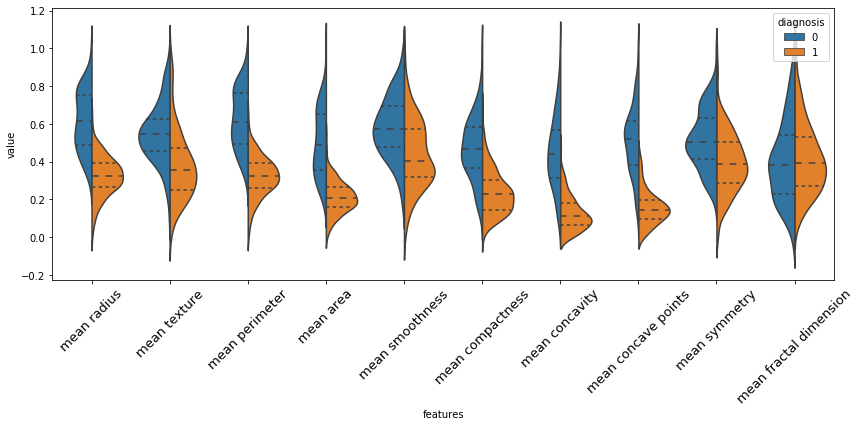

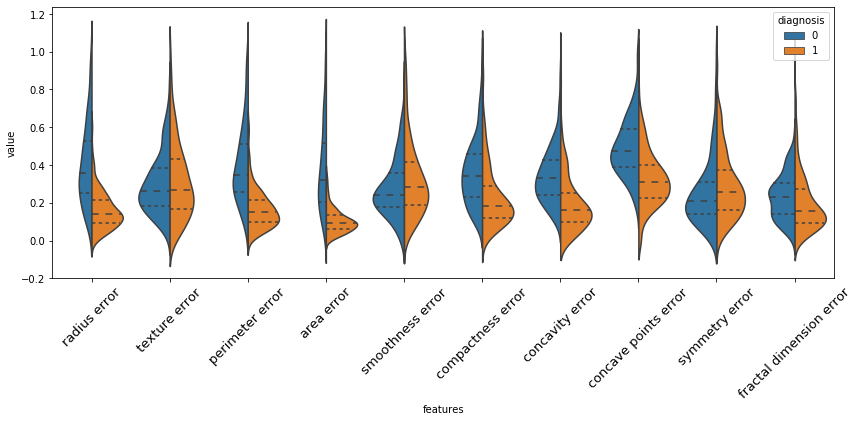

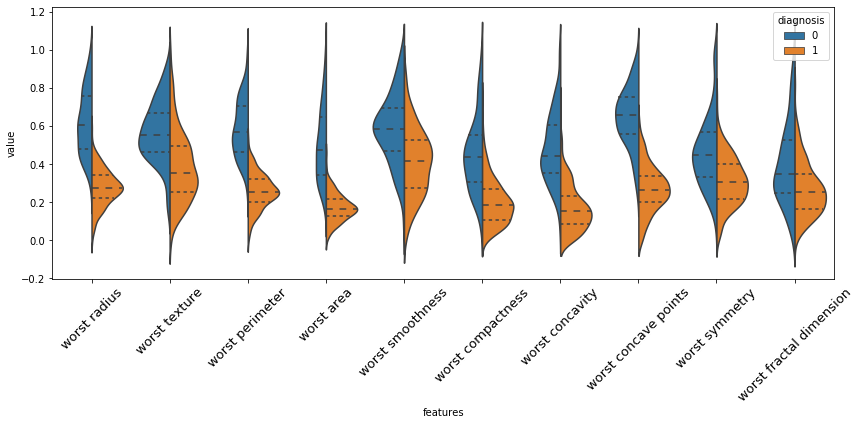

In [109]:
cols = [col for col in df2.columns if col.startswith('mean')]
data_t=X_train_z.copy()
data_t['diagnosis']=y_train_z
data = pd.concat([data_t['diagnosis'],data_t.loc[:,cols]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(14,5))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=45,fontsize=13);

cols = [col for col in df2.columns if col.endswith('error')]
data_t=X_train_z.copy()
data_t['diagnosis']=y_train_z
data = pd.concat([data_t['diagnosis'],data_t.loc[:,cols]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(14,5))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=45,fontsize=13);

cols = [col for col in df2.columns if col.startswith('worst')]
data_t=X_train_z.copy()
data_t['diagnosis']=y_train_z
data = pd.concat([data_t['diagnosis'],data_t.loc[:,cols]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(14,5))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=45,fontsize=13);

This representation is useful also to see which features are better to separate the two class. 
For example in the worst radius the medians are far from a common axis and the two shapes are vary different so probably this is a good feature for the classification. By contrast the worst fractal dimension median of the Malignant and Benign does not looks like separated so it does not gives good information for classification.

# Correlation analysis <a class="anchor" id="chapter5"></a>
Correlation is a technique for investigating the relationship between two quantitative and continuous variables.

Correlation coefficient:
>![coeff_corr](https://wikimedia.org/api/rest_v1/media/math/render/svg/042c646e848d2dc6e15d7b5c7a5b891941b2eab6)

Correlation matrix:
>![corr](https://wikimedia.org/api/rest_v1/media/math/render/svg/2b9c2079a3ffc1aacd36201ea0a3fb2460dc226f)


It's a measure of the strength of the association between the two variables. It has a value between +1 and −1, where a value of +1 is a total positive linear correlation, 0 is no linear correlation, and −1 is total negative linear correlation.

Features with high correlation have almost the same effect on the dependent variable. So, when two features have a high correlation, we can drop one of the two features. This aspect refers allow to filter the features and reduce the dimensions of the dataset, with a null or a small loss of information. Consequently the time and the computational costs are reduced.

In this analysis, we calculate a correlation matrix only on the training set and for each couple of features with a coefficient of correlation higher than 0.95 we will drop one in both the training and test set.

In [12]:
z = X_train_z.corr().values
z_text = np.around(z, decimals=2) 
x=list(X_train_z.columns)
y=list(X_train_z.columns)
fig = ff.create_annotated_heatmap(z,x,y,annotation_text=z_text, colorscale='curl',hoverinfo='z',zmin=-1.0,zmax=1,zmid=0)

for i in range(len(fig.layout.annotations)):
    fig.layout.annotations[i].font.size = 8
fig.update_layout(height=700, width=900)
print(color.BOLD+'Correlation Matrix'+color.END)
fig.show()


Correlation Matrix


We can see that there are a lot of attributes highly correlated each other, indeed the attributes with a color near to the 'dark-red' color represents an high positive correlation.
The feature too much correlated and dropped are the following:




In [13]:
print(color.RED+'Features to drop:'+color.END)
corr_matrix = X_train_z.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
for el in to_drop:
  print(el)
X_train_IQR_fs=X_train_IQR.copy()
X_train_IQR_fs.drop(to_drop, axis=1, inplace=True)
X_test_IQR_fs=X_test_IQR.copy()
X_test_IQR_fs.drop(to_drop, axis=1, inplace=True)
X_train_z_fs=X_train_z.copy()
X_train_z_fs.drop(to_drop, axis=1, inplace=True)
X_test_z_fs=X_test_z.copy()
X_test_z_fs.drop(to_drop, axis=1, inplace=True)


Features to drop:
mean perimeter
mean area
perimeter error
area error
worst radius
worst perimeter
worst area


In [14]:
z = X_train_z_fs.corr().values
z_text = np.around(z, decimals=2) # Only show rounded value (full value on hover)
x=list(X_train_z_fs.columns)
y=list(X_train_z_fs.columns)
fig = ff.create_annotated_heatmap(z,x,y,annotation_text=z_text, colorscale='curl',hoverinfo='z',zmin=-1,zmax=1,zmid=0)
# Make text size smaller
for i in range(len(fig.layout.annotations)):
    fig.layout.annotations[i].font.size = 8
print(color.BOLD+'Heatmap after Features Filtering'+color.END+ f'\t (total features: {X_train_z_fs.shape[1]})')
fig.show()

Heatmap after Features Filtering	 (total features: 23)


# Feature Selection and Classification Trees <a class="anchor" id="chapter6"></a>
Before Talking about feature importance and selection we will introduce first the algorithms on which is based the technique used in this section, the tree-based methods.

## Decision Tree <a class="anchor" id="section_6_1"></a>
These type of classificators split the first space of the data into a number of simple regions. These splits are based on rules and the entire process can be represented as a tree. Trees can be used both for classification and regression task.
 The fundamental parts of a tree are the internal node that represents the rule on which each split is done. Branches, which arise from the node, represent different options that are available when making a particular decision. The leaves represent possible outcomes for each action. 
Growing a tree involves deciding on which features to choose and what conditions to use for splitting, along with knowing when to stop.

The construction of a tree is a greedy approach that is known as recursive binary splitting. 
It begins at the top of the tree and then successively splits the predictor space into regions, at each step of the tree-building process, the best split is made at that particular step, rather than looking ahead and picking a split that will lead to a better tree in some future step.
This is done thanks to a cost function that find most homogeneous branches, or branches having groups with similar responses, for the classification, the most commonly used one is the Gini index.

The Gini index is defined by 

$G = \sum_{i=1}^{K} p^*_{mk}(1 − p^*_{mk})$  

where $p^*_{mk}$ represents the proportion of training observations in the $m$th region that are from the $k$th class

It's a measure of total variance across the classes. The Gini index takes on a small value if all of the $p^*_{mk}$’s are close to zero or one. 

It gives an idea of how good a split is by how mixed the response classes are in the groups created by the split, for this reason, the Gini index is referred to as a measure of node purity, a perfect class purity occurs when a group contains all inputs from the same class.
An alternative to the Gini index is cross-entropy, given by 

$D =-\sum_{i=1}^{K} p^*_{mk}(log(p^*_{mk}))$. 

The most common stopping criterion is the maximum depth that refers to the length of the longest path from the initial node to a leaf.

Another important aspect during the tree construction is the pruning of the worst branches because if we build the biggest possible tree we have high accuracy on the training set but we are overfitting the data and probably on the test set our tree doesn't predict the right classes because isn't able to generalize.

The simplest method of pruning starts at leaves and removes each node with the most popular class in that leaf, this change is kept if it doesn't deteriorate accuracy. Its also called reduced error pruning. More sophisticated pruning methods can be used such as cost complexity pruning where a learning parameter (alpha) is used to weigh whether nodes can be removed based on the size of the sub-tree. This is also known as weakest link pruning.
Alpha controls a trade-off between the subtree’s complexity and its fit to the training data. Cross-validation is used to select alpha.
## Random Forest <a class="anchor" id="section_6_2"></a>
Random forest is an ensemble learning method for classification or regression that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.
Typically, for a classification problem with p features, m=√p  features are used in each split.
When building these decision trees a random selection of m predictors is chosen as split candidates from the full set of p predictors. This is a tweak that helps to decorrelates the trees.
## Feature importance <a class="anchor" id="section_6_3"></a>
Feature importance is the process to quantify the relevance of each feature used during the classification.
This analysis's useful for the feature selection that allows reducing the number of attributes.
The features with a low rate of importance are unuseful or in some case can be seen as noise during the construction of the model, thus removing them can optimize the model building process or also improve the model performance. Some machine learning algorithms perform feature selection automatically as part of learning the model, among there are the tree-based methods. We will use the random forest classifier to extract the information about the relevance of each feature.  
The tree-based strategies used by random forests naturally rank by how well they improve the purity of the node. This mean decrease in impurity over all trees (called Gini impurity). Nodes with the greatest decrease in impurity happen at the start of the trees, while nodes with the least decrease in impurity occur at the end of trees. Thus, by pruning trees below a particular node, we can create a subset of the most important features. 
In this analysis we will use the random forest feature evaluation to remove the worst features.

			IQR Dataset

The accuracy using StratifiedK-Fold is  0.9639405288843491


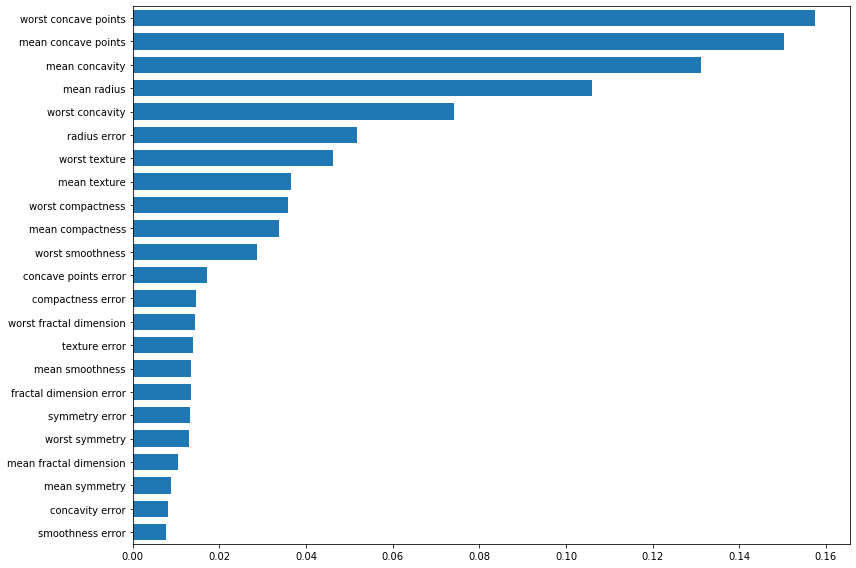

Features to drop:
	 smoothness error
	 concavity error
	 mean symmetry
	 mean fractal dimension
	 worst symmetry
	 symmetry error
	 fractal dimension error
	 mean smoothness
	 texture error
	 worst fractal dimension

The accuracy using StratifiedK-Fold after the feature selection is  0.9660287858854307

			Z-score Dataset

The accuracy using StratifiedK-Fold is  0.9618095335306727


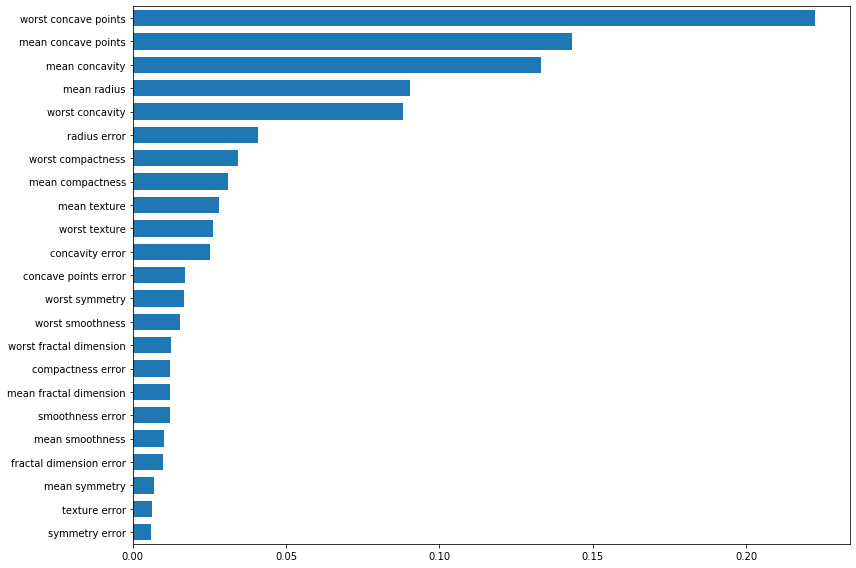

Features to drop:
	 symmetry error
	 texture error
	 mean symmetry
	 fractal dimension error
	 mean smoothness
	 smoothness error
	 mean fractal dimension
	 compactness error
	 worst fractal dimension
	 worst smoothness

The accuracy using StratifiedK-Fold after the feature selection is  0.9656462682245502


In [15]:
skf = StratifiedKFold(n_splits=5)
skf.get_n_splits(X_train_IQR_fs, y_train_IQR)
print('\t\t\tIQR Dataset')
acc=[]
for train_index, test_index in skf.split(X_train_IQR_fs.values, y_train_IQR.values):
    trainx, testx = X_train_IQR_fs.values[train_index], X_train_IQR_fs.values[test_index]
    trainy, testy = y_train_IQR.values[train_index], y_train_IQR.values[test_index]
    clf = RandomForestClassifier(random_state=42)
    clf.fit(trainx, trainy)
    acc.append((f1_score(clf.predict(testx), testy)))
print("\nThe accuracy using StratifiedK-Fold is ",np.array(acc).mean())
tree_importance_sorted_idx = np.argsort(clf.feature_importances_)
tree_indices = np.arange(0, len(clf.feature_importances_)) + 0.5

fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.barh(tree_indices,
         clf.feature_importances_[tree_importance_sorted_idx], height=0.7)
ax1.set_yticklabels(X_train_IQR_fs.columns[tree_importance_sorted_idx])
ax1.set_yticks(tree_indices)
ax1.set_ylim((0, len(clf.feature_importances_)))
fig.tight_layout()

plt.show()

to_drop = X_train_IQR_fs.columns[tree_importance_sorted_idx][:10]
print(color.RED+"Features to drop:"+color.END)
for el in list(to_drop):
  print("\t",el)
X_train_IQR_fs.drop(to_drop, axis=1, inplace=True)
X_test_IQR_fs.drop(to_drop, axis=1, inplace=True)
skf.get_n_splits(X_train_IQR_fs, y_train_IQR)
acc=[]
for train_index, test_index in skf.split(X_train_IQR_fs.values, y_train_IQR.values):
    trainx, testx = X_train_IQR_fs.values[train_index], X_train_IQR_fs.values[test_index]
    trainy, testy = y_train_IQR.values[train_index], y_train_IQR.values[test_index]
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(trainx, trainy)
    acc.append((f1_score(rf.predict(testx), testy)))
print("\nThe accuracy using StratifiedK-Fold after the feature selection is ",np.array(acc).mean())
print('\n\t\t\tZ-score Dataset')
skf.get_n_splits(X_train_z_fs, y_train_z)
acc=[]
for train_index, test_index in skf.split(X_train_z_fs.values, y_train_z.values):
    trainx, testx = X_train_z_fs.values[train_index], X_train_z_fs.values[test_index]
    trainy, testy = y_train_z.values[train_index], y_train_z.values[test_index]
    clf = RandomForestClassifier(random_state=42)
    clf.fit(trainx, trainy)
    acc.append((f1_score(clf.predict(testx), testy)))
print("\nThe accuracy using StratifiedK-Fold is ",np.array(acc).mean())
tree_importance_sorted_idx = np.argsort(clf.feature_importances_)
tree_indices = np.arange(0, len(clf.feature_importances_)) + 0.5

fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.barh(tree_indices,
         clf.feature_importances_[tree_importance_sorted_idx], height=0.7)
ax1.set_yticklabels(X_train_z_fs.columns[tree_importance_sorted_idx])
ax1.set_yticks(tree_indices)
ax1.set_ylim((0, len(clf.feature_importances_)))
fig.tight_layout()

plt.show()

to_drop = X_train_z_fs.columns[tree_importance_sorted_idx][:10]
print(color.RED+"Features to drop:"+color.END)
for el in list(to_drop):
  print("\t",el)
X_train_z_fs.drop(to_drop, axis=1, inplace=True)
X_test_z_fs.drop(to_drop, axis=1, inplace=True)
skf.get_n_splits(X_train_z_fs, y_train_z)
acc=[]
for train_index, test_index in skf.split(X_train_z_fs.values, y_train_z.values):
    trainx, testx = X_train_z_fs.values[train_index], X_train_z_fs.values[test_index]
    trainy, testy = y_train_z.values[train_index], y_train_z.values[test_index]
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(trainx, trainy)
    acc.append((f1_score(rf.predict(testx), testy)))
print("\nThe accuracy using StratifiedK-Fold after the feature selection is ",np.array(acc).mean())

We will consider as worst feature, the feature present in the last 5 positions and the we will remove it and make the stratified k-fold validation to evaluate a possible behaviour of the accuracy on the test set.

Using the feature selection with Random Forest Classifier there is a slightly improvement on the validation set for both the two dataset.
Probably the features eliminated might represent noise or redundancy.

# DIMENSIONALITY REDUCTION: PCA <a class="anchor" id="chapter7"></a>
The central idea of principal component analysis (PCA) is to reduce the dimensionality of a data set consisting of a large number of interrelated variables while retaining as much as possible of the variation present in the data set. This is achieved by transforming to a new set of variables, the principal components (PCs), which are uncorrelated, and which are ordered so that the first few retain most of the variation present in all of the original variables.
![](https://i.pinimg.com/originals/5c/66/80/5c6680eca5949615992c87b36040481c.gif)

Considering our data set as the matrix $X$, we want to project the rows of the matrix $X$ into a new set of attributes in such a way the features have zero covariance to each other, thus they are orthogonal and each attribute must contain the most remaining variance. The covariance is to evaluate the variability in the data.
The first step is to center the data, then we use the singular value decomposition **SVD** to compute the principal components of X.
Considered that: $X=U{\Sigma}V^T$
and $S=XX^T=U{\begin{bmatrix}\lambda_1 &&\\&...&\\&&\lambda_d \end{bmatrix}}U^T$ then

$XX^T=U{\Sigma}V^T(U{\Sigma}V^T)^T=U{\Sigma}V^TV{\Sigma}^TU^T=U{\hat {\Sigma }} ^{2}U^T$.

* $U$ is $d$ x $n$ orthogonal matrix, i.e. $U^TU=I$, and the columns of $U$ are the eigenvectors of $XX^T$, called left singular vectors.
* $V$ is $n$ x $n$ orthogonal matrix, i.e. $V^TV=I$, and the columns of $V$ are the eigenvectors of $X^TX$, called right singular vectors.
* $\Sigma$ is $n$ x $n$ diagonal matrix; such that the elements are ordered from the greater in position 1,1 to the smaller in position $n$,$n$. These numbers are the square root of the eigenvalues of $X^TX$, called singular values.
* $\hat {\Sigma }$ is the square diagonal matrix with the singular values of $X$ and the excess zeros chopped off that satisfies ${{\hat {\Sigma }}^{2}}=\Sigma^T\Sigma$

The left singular vectors of $X$ are the principal components, we sort them by the size of the singular values of $X$ because the variance in the direction of the $k$-th principal component is given by the corresponding singular value $\sigma_k^2$.

Using the singular value decomposition we can calculate the score matrix: $T=XV=U\Sigma{V^T}V=U\Sigma,$
so each column of $T$ is given by one of the left singular vectors of $X$ multiplied by the corresponding singular value.

The Principal Component Analysis is a special case of SVD on the centered covariance matrix.
Another important characteristic is that the chosen vectors are such that minimize the sum of square
differences between the data vectors and the low-dimensional
projections.
A general rule to apply the PCA is to keep the 85% of variance.
$ \frac{\sum_{j=1}^k\sigma_j^2}{\sum_{j=1}^n\sigma_j^2} ≈ 0.85$



In [16]:
pca2=PCA(n_components=30)
pca2.fit(X_train_z)
cum_var_exp = np.cumsum(pca2.explained_variance_ratio_)
trace0 = go.Scatter(
    x = [i+1 for i in range(len(pca2.explained_variance_ratio_))],
    y = pca2.explained_variance_ratio_,
    mode = 'lines+markers',
    name = 'individual explained variance'
)

trace1 = go.Scatter(
    x = [i+1 for i in range(len(pca2.explained_variance_ratio_))],
    y = cum_var_exp,
    mode = 'lines+markers',
    name = 'cumulative explained variance'
)
data = [trace0, trace1]
layout = go.Layout(title = "PCA Analysis", xaxis = {'title':'Number of components'}, yaxis = {'title':'Explained variance'})
fig = go.Figure(data=data,layout=layout)
fig.add_shape(
        # Line Horizontal
            type="line",
            x0=0,
            y0=0.85,
            x1=30,
            y1=0.85,
            line=dict(
                color="LightSeaGreen",
                width=2,
                dash="dashdot",))
fig.show()

From the graph we are ablo to identifie the right number of components and we choose the first 5.

In [17]:
from sklearn.decomposition import PCA
import plotly.express as px
pca = PCA(n_components=5)
pca.fit(X_train_z)
components_train = pca.transform(X_train_z)
components_test = pca.transform(X_test_z)
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}
total_var = pca.explained_variance_ratio_.sum() * 100
fig = px.scatter_matrix(
    components_train,
    labels=labels,
    dimensions=range(5),
    color=y_train_z,
    width=700,height=700,
    title=f'Total Explained Variance: {total_var}'
)
fig.update_traces(diagonal_visible=False)
fig.show()

As we can see from the matrix of the scatter plots the most of the variance is explained in the first component(48,3%) , indeed in the representations with the first component and the others(first column), we can see that the points are well separable.
Now considered the high variance explained from the three first components we can plot the 3d representation of the data to have an approximative idea of the distribution in the space

In [18]:
pca3 = PCA(n_components=3)
pca3.fit(X_train_z)
components2=pca3.transform(X_train_z)

total_var = pca3.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components2, x=0, y=1, z=2, color=y_train_z,
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

# REBALANCING <a class="anchor" id="chapter8"></a>
As we have seen in the bar plot of the distribution, our dataset is unbalanced with a rapport of 1.68:1 in favour of the benign cases.
A good approach to handle this kind of dataset is to resample the training set. 
There are two kind of resampling, the oversampling that generate or resort new samples in such a way to have a balanced dataset and the undersampling method that remove the examples in excess in the major class, using a rule or randomly.
![balance](https://miro.medium.com/max/2956/1*YfQc_bSmbrlgD9gVd6f99A.png)
There are a lot of techniques for both the two methods, I will use the SMOTE for oversampling and the random undersampling.


## OVERSAMPLING WITH SMOTE <a class="anchor" id="section_8_1"></a>
Synthetic Minority Oversampling Technique or SMOTE, first selects a minority class instance A at random and finds its k nearest minority class, neighbours. The synthetic instance is then created by choosing one of the k nearest neighbours B at random and connecting A and B to form a line segment in the feature space. The synthetic instances are generated as a convex combination of the two chosen instances a and b.

![](https://miro.medium.com/max/700/1*x9KrrnZFwj9Wcw1OnozRLQ.png)

A general downside of the approach is that synthetic examples are created without considering the majority class, possibly resulting in ambiguous examples if there is a strong overlap for the classes.Basically you’re simulating some additional variation in the data (within the established bounds of your minority class), reducing the danger of overfitting (although not eliminating it).

>![](https://www.cs.cmu.edu/afs/cs/project/jair/pub/volume16/chawla02a-html/img8.gif)



## UNDERSAMPLING <a class="anchor" id="section_8_2"></a>
The technique used for undersampling is the Randam Under Sampling, thus the majority class instances are discarded at random until a more balanced distribution is reached.



## COMBINED OVER-UNDER SAMPLING <a class="anchor" id="section_8_3"></a>
The original paper on SMOTE suggests that combining SMOTE with random undersampling of the majority class improves the accuracy and is a good compromise between the two approach.
So we will first upsample the minority class with smote in such a way the samples are doubled and then we will apply the random under sampler to balance the two classes and reduce the majority class.

In [19]:
sm=SMOTE(random_state=42)
X_res,y_res=sm.fit_resample(X_train_z,y_train_z)
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X_train_z, y_train_z)
over = SMOTE(sampling_strategy=1,random_state=42)
under = RandomUnderSampler(sampling_strategy=0.6,random_state=42)
steps = [ ('u', under),('o', over)]
pipeline = Pipeline(steps=steps)
X_UD, y_UD = pipeline.fit_resample(X_train_z, y_train_z)

temp0=PCA(n_components=2).fit_transform(X_train_z)
temp0=pd.DataFrame(temp0,columns=['PC-1','PC-2'])
temp1=PCA(n_components=2).fit_transform(X_res)
temp1=pd.DataFrame(temp1,columns=['PC-1','PC-2'])
temp2=PCA(n_components=2).fit_transform(X_rus)
temp2=pd.DataFrame(temp2,columns=['PC-1','PC-2'])
temp3=PCA(n_components=2).fit_transform(X_UD)
temp3=pd.DataFrame(temp3,columns=['PC-1','PC-2'])

data = [go.Bar(
   y = [y_train_z.value_counts()[0],y_res.value_counts()[0],y_rus.value_counts()[0],y_UD.value_counts()[0]],
   x = ["unbalanced ",'oversampling', "undersampling",'combined'],
   name='malignant'
),go.Bar(
   y = [y_train_z.value_counts()[1],y_res.value_counts()[1],y_rus.value_counts()[1],y_UD.value_counts()[1]],
   x = ["unbalanced ",'oversampling', "undersampling",'combined'],name = 'benignant',
   texttemplate=[f'{y_train_z.value_counts().sum()}',f'{y_res.value_counts().sum()}',f'{y_rus.value_counts().sum()}',f'{y_UD.value_counts().sum()}'], textposition='outside'
)]
layout=go.Layout(barmode='stack',width=600,)
fig = go.Figure(data=data,layout=layout)
fig.show()

fig = make_subplots(rows=2, cols=2,subplot_titles=('unbalanced','Combined resampling', 'SMOTE', 'random undersampling'))

fig.add_trace(
    go.Scatter(x=np.array(temp0['PC-1']), y=np.array(temp0['PC-2']),mode='markers',marker_color=y_train_z),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=np.array(temp3['PC-1']), y=np.array(temp3['PC-2']),mode='markers',marker_color=y_UD),
    row=1, col=2
)

fig.add_trace(
    go.Scatter(x=np.array(temp1['PC-1']), y=np.array(temp1['PC-2']),mode='markers',marker_color=y_res),
    row=2, col=1
)
fig.add_trace(
    go.Scatter(x=np.array(temp2['PC-1']), y=np.array(temp2['PC-2']),mode='markers',marker_color=y_rus),
    row=2, col=2
)


fig.update_layout()
fig.show()

# Stratified K-Fold <a class="anchor" id="chapter9"></a>
A widely used approach to select the best model, and to give an idea of the test error of the final choosen model is the cross-validation.
The idea behind this technique is to randomly divide the data into K equal-sized parts. We leave out part k, fit the model to the other K-1 parts (combined), and then obtain predictions for the left-out kth part.
This is done in turn for each part k = 1, 2,...K, and then the error estimation is averaged over all k trials to get total effectiveness of our model. As can be seen, every data point gets to be in a validation set exactly once and gets to be in a training set k-1 times. This significantly reduces bias as we are using most of the data for fitting, and also significantly reduces variance as most of the data is also being used in the validation set. 
A variation for the K-Fold cross-validation technique is the stratified version. The stratification allows having the same distribution in each subset for training and validation.

>![](https://image.slidesharecdn.com/kagglesharingmarkpeng20151216finalpresented-151216161621/95/general-tips-for-participating-kaggle-competitions-13-638.jpg?cb=1452565877)


In [20]:
Skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

print(color.BLUE+'K-fold:\n '+color.END)
for train_ix, test_ix in kfold.split(X_train_z.values):
    train_X, test_X = X_train_z.values[train_ix], X_train_z.values[test_ix]
    train_y, test_y = y_train_z.values[train_ix], y_train_z.values[test_ix]
    train_0, train_1 = len(train_y[train_y==0]), len(train_y[train_y==1])
    test_0, test_1 = len(test_y[test_y==0]), len(test_y[test_y==1])
    print('Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))

print(color.RED+'\nStratified K-fold:\n '+color.END)
for train_ix, test_ix in Skfold.split(X_train_z.values, y_train_z.values):
    train_X, test_X = X_train_z.values[train_ix], X_train_z.values[test_ix]
    train_y, test_y = y_train_z.values[train_ix], y_train_z.values[test_ix]
    train_0, train_1 = len(train_y[train_y==0]), len(train_y[train_y==1])
    test_0, test_1 = len(test_y[test_y==0]), len(test_y[test_y==1])
    print('Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))


K-fold:
 
Train: 0=94, 1=202, Test: 0=29, 1=45
Train: 0=97, 1=199, Test: 0=26, 1=48
Train: 0=102, 1=194, Test: 0=21, 1=53
Train: 0=100, 1=196, Test: 0=23, 1=51
Train: 0=99, 1=197, Test: 0=24, 1=50

Stratified K-fold:
 
Train: 0=98, 1=198, Test: 0=25, 1=49
Train: 0=98, 1=198, Test: 0=25, 1=49
Train: 0=98, 1=198, Test: 0=25, 1=49
Train: 0=99, 1=197, Test: 0=24, 1=50
Train: 0=99, 1=197, Test: 0=24, 1=50


# Evaluation Metrics <a class="anchor" id="chapter10"></a>
* Precision is the ratio of correctly predicted positive observations to the total predicted positive observations.
$Precision = \frac{TP}{TP+FP}$

* Recall or sensitivity is the ratio of correctly predicted positive observations to the all observations in actual class.
$Recall= \frac{TP}{TP+FN}$

* F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. It is usually more useful than accuracy, especially with an uneven class distribution.

 $F1 = 2 * \frac{precision * recall}{precision + recall}$


* A clean and unambiguous way to present the prediction results of a classifier is to use a confusion matrix that represent the number of TP,TN,FP,FN.

![](https://miro.medium.com/max/700/1*PULzWEven_XAZjiMNizDCg.png)

We will use for the validation process F1 score.
Anoter technique very useful for the binary classification problems are the ROC curves and tha Area Under the Curve.

A ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

True Positive Rate or $Recall$

and

False Positive Rate: $FPR=FP/(FP+TN)$ 

AUC measures the entire two-dimensional area underneath the entire ROC curve and represents  a degree or measure of separability. It tells how much the model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s.

![](https://glassboxmedicine.files.wordpress.com/2019/02/roc-curve-v2.png?w=576)




# Model Selection <a class="anchor" id="chapter11"></a>
For the model selection we will use a combination of datasets with different pre-processing in order to found the best combination between pre-processing techniques and hyperparameters.
We will evaluate the different models using the stratified cross-validation.
Another important aspect to underline, is that we will rebalance only the training set partitioned during the Stratified K-fold, thus the rebalancing isn't used on the validation sets.
After we found the best combination of preprocessing method and hyperparameters with the Stratified k-fold, the optimal configuration is used on the test set for each model.

In [21]:
from sklearn.metrics import roc_auc_score
def tr_val_eval(X_tr,y_tr,X_te,y_te,classifier,params,outl='IQR',stratified=True,pca=True):
    if stratified:
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    else:
        cv=KFold(n_splits=5, shuffle=True, random_state=42)
    over = SMOTE(sampling_strategy=1,random_state=42)
    under = RandomUnderSampler(sampling_strategy=0.6,random_state=42)
    steps = [('under',under), ('over',over), ('model', classifier)]
    imba_pipeline = Pipeline(steps=steps)
    if pca:
        pca = PCA(n_components=5)
        pca.fit(X_tr)
        X_tr = pca.transform(X_tr)
        X_te = pca.transform(X_te)
        #print(f'\t\tPCA with'+outl+' AND COMBINED-RESAMPLING')
    #else:
        #print(f'\t\tFeature Selection with'+ outl+' AND COMBINED-RESAMPLING')
    new_params = {'model__'+ k : params[k] for k in params}
    grid_imba = GridSearchCV(imba_pipeline, param_grid=new_params, cv=cv, scoring='f1',return_train_score=True,n_jobs=-1)
    grid_imba.fit(X_tr, y_tr)
    fbc=grid_imba.best_params_
    new_fbc={}
    for k,v in fbc.items():
        new_fbc[k[7:]]=v
    fv=grid_imba.best_score_
    #print(f'  Validation Score:{round(fv,3)*100}%\n')
    return new_fbc,fv

In [22]:
def tr_val_eval1(X_tr,y_tr,X_te,y_te,classifier,params,outl='IQR',stratified=True,pca=True):
    if stratified:
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    else:
        cv=KFolt(n_splits=5, shuffle=True, random_state=42)
    under = RandomUnderSampler(random_state=42)
    steps = [('under',under),('model', classifier)]
    imba_pipeline = Pipeline(steps=steps)
    if pca:
        pca = PCA(n_components=5)
        pca.fit(X_tr)
        X_tr = pca.transform(X_tr)
        X_te = pca.transform(X_te)
        #print(f'\t\tPCA with'+outl+' AND UNDERSAMPLING')
    #else:
        #print(f'\t\tFeature Selection with'+ outl+' AND UNDERSAMPLING')
    new_params = {'model__'+ k : params[k] for k in params}
    grid_imba = GridSearchCV(imba_pipeline, param_grid=new_params, cv=cv, scoring='f1',return_train_score=True,n_jobs=-1)
    grid_imba.fit(X_tr, y_tr)
    fbc=grid_imba.best_params_
    new_fbc={}
    for k,v in fbc.items():
        new_fbc[k[7:]]=v
    fv=grid_imba.best_score_
    #print(f'  Validation Score:{round(fv,3)*100}%\n')
    return new_fbc,fv

In [23]:
from sklearn.metrics import roc_auc_score
def tr_val_eval2(X_tr,y_tr,X_te,y_te,classifier,params,outl='IQR',stratified=True,pca=True):
    if stratified:
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    else:
        cv=KFolt(n_splits=5, shuffle=True, random_state=42)
    over = SMOTE(sampling_strategy=1,random_state=42)
    steps = [('over',over), ('model', classifier)]
    imba_pipeline = Pipeline(steps=steps)
    if pca:
        pca = PCA(n_components=5)
        pca.fit(X_tr)
        X_tr = pca.transform(X_tr)
        X_te = pca.transform(X_te)
        #print(f'\t\tPCA with'+outl+' AND OVERSAMPLING')
    #else:
        #print(f'\t\tFeature Selection with'+ outl+' AND OVERSAMPLING')
    new_params = {'model__'+ k : params[k] for k in params}
    grid_imba = GridSearchCV(imba_pipeline, param_grid=new_params, cv=cv, scoring='f1',return_train_score=True,n_jobs=-1)
    grid_imba.fit(X_tr, y_tr)
    fbc=grid_imba.best_params_
    new_fbc={}
    for k,v in fbc.items():
        new_fbc[k[7:]]=v
    fv=grid_imba.best_score_
    #print(f'  Validation Score:{round(fv,3)*100}%\n')
    return new_fbc,fv

In [24]:
from sklearn.metrics import roc_auc_score
def tr_val_eval3(X_tr,y_tr,X_te,y_te,classifier,params,outl='IQR',stratified=True,pca=True):
    if stratified:
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    else:
        cv=KFolt(n_splits=5, shuffle=True, random_state=42)
    steps = [('model', classifier)]
    imba_pipeline = Pipeline(steps=steps)
    if pca:
        pca = PCA(n_components=5)
        pca.fit(X_tr)
        X_tr = pca.transform(X_tr)
        X_te = pca.transform(X_te)
        #print(f'\t\tPCA with'+outl)
    #else:
        #print(f'\t\tFeature Selection with'+ outl)
    new_params = {'model__'+ k : params[k] for k in params}
    grid_imba = GridSearchCV(imba_pipeline, param_grid=new_params, cv=cv, scoring='f1',return_train_score=True,n_jobs=-1)
    grid_imba.fit(X_tr, y_tr)
    fbc=grid_imba.best_params_
    new_fbc={}
    for k,v in fbc.items():
        new_fbc[k[7:]]=v
    fv=grid_imba.best_score_
    #print(f'  Validation Score:{round(fv,3)*100}%\n')
    return new_fbc,fv

In [46]:
from sklearn.metrics import roc_curve,auc,precision_score
def test_task(X,y,X_t,y_t,classifier,sampling=None,disp=True):
    over = SMOTE(sampling_strategy=1,random_state=42)
    under = RandomUnderSampler(sampling_strategy=0.6,random_state=42)
    under_base= RandomUnderSampler(random_state=42)
    if sampling==None:
        steps=[]
        X_UD=X
        y_UD=y
    if sampling=='over':
        X_UD, y_UD = over.fit_resample(X, y) 
    if sampling=='under':
        X_UD, y_UD = under_base.fit_resample(X, y)
    if sampling=='combined':
        steps = [('u', under),('o', over)]
        pipeline = Pipeline(steps=steps)
        X_UD, y_UD = pipeline.fit_resample(X, y)
    classifier.fit(X_UD,y_UD)
    xp=classifier.predict(X_t)
    if disp:
        print(f'f1: {round(f1_score(xp,y_t),3)}\trecall: {round(recall_score(xp,y_t),3)}\tprecision: {round(precision_score(xp,y_t),3)}')
        fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(xp,y_test),show_absolute=True,show_normed=True,colorbar=True)
        plt.show()
        fpr, tpr, thresholds = roc_curve(xp, y_t)
        fig = px.area(x=fpr, y=tpr,title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',labels=dict(x='False Positive Rate', y='True Positive Rate'),width=700, height=500)
        fig.add_shape(type='line', line=dict(dash='dash'),x0=0, x1=1, y0=0, y1=1)
        fig.update_yaxes(scaleanchor="x", scaleratio=1)
        fig.update_xaxes(constrain='domain')
        fig.show()
    return classifier,round(f1_score(xp,y_t),3)

## Linear Classifier: Logistic Regression <a class="anchor" id="section_11_1"></a>
Linear regression is one of the most widely used regression models. 
The mathematical formulation of the linear regression is the following:

$
{\displaystyle \mathbf {y} =X{\boldsymbol {\beta }}+{\boldsymbol {\varepsilon }},\,}$

with

$\mathbf {y} ={\begin{pmatrix}y_{1}\\y_{2}\\\vdots \\y_{n}\end{pmatrix}},\quad $
${\displaystyle X={\begin{pmatrix}\mathbf {x} _{1}^{\mathsf {T}}\\\mathbf {x} _{2}^{\mathsf {T}}\\\vdots \\\mathbf {x} _{n}^{\mathsf {T}}\end{pmatrix}}={\begin{pmatrix}1&x_{11}&\cdots &x_{1p}\\1&x_{21}&\cdots &x_{2p}\\\vdots &\vdots &\ddots &\vdots \\1&x_{n1}&\cdots &x_{np}\end{pmatrix}},}$
${\displaystyle {\boldsymbol {\beta }}={\begin{pmatrix}\beta _{0}\\\beta _{1}\\\beta _{2}\\\vdots \\\beta _{p}\end{pmatrix}},\quad {\boldsymbol {\varepsilon }}={\begin{pmatrix}\varepsilon _{1}\\\varepsilon _{2}\\\vdots \\\varepsilon _{n}\end{pmatrix}}}$

where $\beta X$ represents the inner product between the input vector $X$ and the model's weight vector $\beta$ and $\varepsilon$ is the residual error between our linear predictions and the true response.
The betas are random variables or can be defined as the estimetors of the model.

$\beta=(X^TX)^{-1}X^TY$ 

Given: $ E(Y |X = x) = Pr(Y = 1|X = x)$ ,
we can think to use the linear regression to make classification using some threshold on the output predicted. But this isn't an optimal method because the output can be greater than 1 or negative.
A Better model is the logistic Regression.

![](https://static.javatpoint.com/tutorial/machine-learning/images/linear-regression-vs-logistic-regression.png)

We can generalize linear regression to the binary classification setting, replacing the gaussian distribution with the Bernoulli Distribution that fit better a binary classification problem and then we compute a linear combination of the inputs passed through a logistic function.
The logistic function is a sigmoid function, which takes as input(real) ${\displaystyle t=\beta _{0}+\beta _{1}x}$ and outputs a value between zero and one

For the logit, this is interpreted as taking input log-odds and having output probability. The standard logistic function ${\displaystyle \sigma :\mathbb {R} \rightarrow (0,1)} $ is defined as follows:

${\displaystyle \sigma (t)={\frac {e^{t}}{e^{t}+1}}={\frac {1}{1+e^{-t}}}}$

And the general logistic function ${\displaystyle p:\mathbb {R} \rightarrow (0,1)}$ can now be written as:

${\displaystyle p(x)=\sigma (t)={\frac {1}{1+e^{-(\beta _{0}+\beta _{1}x)}}}}$

In the logistic model, ${\displaystyle p(x)}$ is interpreted as the probability of the dependent variable ${\displaystyle Y}$ equaling a success/case rather than a failure/non-case.

The logit or log odds function can be written as the inverse ${\displaystyle g=\sigma ^{-1}}$ of the standard logistic function. It is easy to see that it satisfies:

${\displaystyle g(p(x))=\sigma ^{-1}(p(x))=\operatorname {logit} p(x)=\ln \left({\frac {p(x)}{1-p(x)}}\right)=\beta _{0}+\beta _{1}x,}$

that becomes:
${\displaystyle {\frac {p(x)}{1-p(x)}}=e^{\beta _{0}+\beta _{1}x}.}$

To estimate the parameters we use the maximum likelihood estimation thus we pick β0 and β1 to maximize the likelihood
of the observed data.
![](https://drive.google.com/uc?export=view&id=11kg3A_MtZJ_lzXEtRXS_APw3-NB0Cz7G)

In the case of multiple class we introduce the multiclass logistic regression or multinomial regression.

The expression $t= $ ${\displaystyle \beta _{0}+\beta _{1}x}$
for a multiclass case becomes:

$t=$${\displaystyle \beta _{0}+\beta _{1}x_{1}+\beta _{2}x_{2}+\cdots +\beta _{m}x_{m}=\beta _{0}+\sum _{i=1}^{m}\beta _{i}x_{i}}{\displaystyle \beta _{0}+\beta _{1}x_{1}+\beta _{2}x_{2}+\cdots +\beta _{m}x_{m}=\beta _{0}+\sum _{i=1}^{m}\beta _{i}x_{i}}$

So the model has the following form:

![](https://drive.google.com/uc?export=view&id=1gvuNI5_qcS2OncqqAm_LGqqH__ziE7Sr)





### Results Logistic Regression 

In [41]:
classifier=LogisticRegression()
params={'C': [0.1, 1, 10,100],'random_state':[42]}
fbc0,fv0=tr_val_eval(X_train_IQR_fs,y_train_IQR,X_test_IQR_fs,y_test,classifier,params,pca=False,outl=' IQR')
fbc1,fv1=tr_val_eval(X_train_IQR,y_train_IQR,X_test_IQR,y_test,classifier,params,pca=True,outl=' IQR')
fbc2,fv2=tr_val_eval(X_train_z_fs,y_train_z,X_test_z_fs,y_test,classifier,params,pca=False,outl=' z')
fbc3,fv3=tr_val_eval(X_train_z,y_train_z,X_test_z,y_test,classifier,params,pca=True,outl=' z')
fbc4,fv4=tr_val_eval(X_train_IQR,y_train_IQR,X_test_IQR,y_test,classifier,params,pca=False,outl=' IQR')
fbc5,fv5=tr_val_eval(X_train_z,y_train_z,X_test_z,y_test,classifier,params,pca=False,outl=' z')

fbc01,fv01=tr_val_eval1(X_train_IQR_fs,y_train_IQR,X_test_IQR_fs,y_test,classifier,params,pca=False,outl=' IQR')
fbc11,fv11=tr_val_eval1(X_train_IQR,y_train_IQR,X_test_IQR,y_test,classifier,params,pca=True,outl=' IQR')
fbc21,fv21=tr_val_eval1(X_train_z_fs,y_train_z,X_test_z_fs,y_test,classifier,params,pca=False,outl=' z')
fbc31,fv31=tr_val_eval1(X_train_z,y_train_z,X_test_z,y_test,classifier,params,pca=True,outl=' z')
fbc41,fv41=tr_val_eval1(X_train_IQR,y_train_IQR,X_test_IQR,y_test,classifier,params,pca=False,outl=' IQR')
fbc51,fv51=tr_val_eval1(X_train_z,y_train_z,X_test_z,y_test,classifier,params,pca=False,outl=' z')

fbc02,fv02=tr_val_eval2(X_train_IQR_fs,y_train_IQR,X_test_IQR_fs,y_test,classifier,params,pca=False,outl=' IQR')
fbc12,fv12=tr_val_eval2(X_train_IQR,y_train_IQR,X_test_IQR,y_test,classifier,params,pca=True,outl=' IQR')
fbc22,fv22=tr_val_eval2(X_train_z_fs,y_train_z,X_test_z_fs,y_test,classifier,params,pca=False,outl=' z')
fbc32,fv32=tr_val_eval2(X_train_z,y_train_z,X_test_z,y_test,classifier,params,pca=True,outl=' z')
fbc42,fv42=tr_val_eval2(X_train_IQR,y_train_IQR,X_test_IQR,y_test,classifier,params,pca=False,outl=' IQR')
fbc52,fv52=tr_val_eval2(X_train_z,y_train_z,X_test_z,y_test,classifier,params,pca=False,outl=' z')

fbc03,fv03=tr_val_eval3(X_train_IQR_fs,y_train_IQR,X_test_IQR_fs,y_test,classifier,params,pca=False,outl=' IQR')
fbc13,fv13=tr_val_eval3(X_train_IQR,y_train_IQR,X_test_IQR,y_test,classifier,params,pca=True,outl=' IQR')
fbc23,fv23=tr_val_eval3(X_train_z_fs,y_train_z,X_test_z_fs,y_test,classifier,params,pca=False,outl=' z')
fbc33,fv33=tr_val_eval3(X_train_z,y_train_z,X_test_z,y_test,classifier,params,pca=True,outl=' z')
fbc43,fv43=tr_val_eval3(X_train_IQR,y_train_IQR,X_test_IQR,y_test,classifier,params,pca=False,outl=' IQR')
fbc53,fv53=tr_val_eval3(X_train_z,y_train_z,X_test_z,y_test,classifier,params,pca=False,outl=' z')

d={'IQR + PCA': [fv11,fv12,fv1,fv13],'IQR + F.S.': [fv01,fv02,fv0,fv03],'Z-SCORE + PCA': [fv31,fv32,fv3,fv33],'Z-SCORE + F.S.': [fv21,fv22,fv2,fv23],'Z-SCORE':[fv51,fv52,fv5,fv53],'IQR':[fv41,fv42,fv4,fv43]}
indexes=['oversampling','undersampling','combined','no-resampling']
cols=['IQR','IQR + PCA','IQR + F.S.','Z-SCORE','Z-SCORE + PCA', 'Z-SCORE + F.S.']
pd.DataFrame(index=indexes,columns=cols,data=d )

,IQR,IQR + PCA,IQR + F.S.,Z-SCORE,Z-SCORE + PCA,Z-SCORE + F.S.
oversampling,0.960589,0.967018,0.969863,0.977692,0.977610,0.979755
undersampling,0.975015,0.977260,0.974905,0.977814,0.977694,0.977857
combined,0.967790,0.967455,0.969980,0.977694,0.977694,0.975753
no-resampling,0.977869,0.982213,0.973171,0.982253,0.985939,0.975999


From this results we can see that the best way to remove the outliers is the z-score and the reduction of dimensions works well for both the pca and the feature selection.
Now we can use the best configuration to make predictions.

 BEST CONFIGURATION ON TEST:
f1: 0.978	recall: 0.978	precision: 0.978


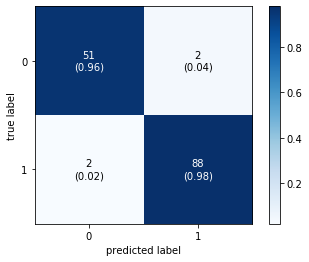

In [47]:
print(color.BLUE+' BEST CONFIGURATION ON TEST:'+color.END)
pca=PCA(n_components=5)
pca.fit(X_train_z)
X_z=pca.transform(X_train_z)
X_t_z=pca.transform(X_test_z)
pca.fit(X_train_IQR)
X_IQR=pca.transform(X_train_IQR)
X_t_IQR=pca.transform(X_test_IQR)
#pca+z
classifier=LogisticRegression(**fbc33)
_,f33=test_task(X_z,y_train_z,X_t_z,y_test,classifier)
classifier=LogisticRegression(**fbc31)
_,f31=test_task(X_z,y_train_z,X_t_z,y_test,classifier,sampling='over',disp=False)
classifier=LogisticRegression(**fbc32)
_,f32=test_task(X_z,y_train_z,X_t_z,y_test,classifier,sampling='under',disp=False)
classifier=LogisticRegression(**fbc3)
_,f3=test_task(X_z,y_train_z,X_t_z,y_test,classifier,sampling='combined',disp=False)
#pca+IQR
classifier=LogisticRegression(**fbc13)
_,f13=test_task(X_IQR,y_train_IQR,X_t_IQR,y_test,classifier,disp=False)
classifier=LogisticRegression(**fbc11)
_,f11=test_task(X_IQR,y_train_IQR,X_t_IQR,y_test,classifier,sampling='over',disp=False)
classifier=LogisticRegression(**fbc12)
_,f12=test_task(X_IQR,y_train_IQR,X_t_IQR,y_test,classifier,sampling='under',disp=False)
classifier=LogisticRegression(**fbc1)
_,f1=test_task(X_IQR,y_train_IQR,X_t_IQR,y_test,classifier,sampling='combined',disp=False)
#IQR+FS
classifier=LogisticRegression(**fbc03)
_,f03=test_task(X_train_IQR_fs,y_train_IQR,X_test_IQR_fs,y_test,classifier,disp=False)
classifier=LogisticRegression(**fbc01)
_,f01=test_task(X_train_IQR_fs,y_train_IQR,X_test_IQR_fs,y_test,classifier,sampling='over',disp=False)
classifier=LogisticRegression(**fbc02)
_,f02=test_task(X_train_IQR_fs,y_train_IQR,X_test_IQR_fs,y_test,classifier,sampling='under',disp=False)
classifier=LogisticRegression(**fbc0)
_,f0=test_task(X_train_IQR_fs,y_train_IQR,X_test_IQR_fs,y_test,classifier,sampling='combined',disp=False)
#z+FS
classifier=LogisticRegression(**fbc21)
_,f23=test_task(X_train_z_fs,y_train_z,X_test_z_fs,y_test,classifier,disp=False)
classifier=LogisticRegression(**fbc21)
_,f21=test_task(X_train_z_fs,y_train_z,X_test_z_fs,y_test,classifier,sampling='over',disp=False)
classifier=LogisticRegression(**fbc22)
_,f22=test_task(X_train_z_fs,y_train_z,X_test_z_fs,y_test,classifier,sampling='under',disp=False)
classifier=LogisticRegression(**fbc2)
_,f2=test_task(X_train_z_fs,y_train_z,X_test_z_fs,y_test,classifier,sampling='combined',disp=False)
#z-score only
classifier=LogisticRegression(**fbc51)
_,f53=test_task(X_train_z,y_train_z,X_test_z,y_test,classifier,disp=False)
classifier=LogisticRegression(**fbc51)
_,f51=test_task(X_train_z,y_train_z,X_test_z,y_test,classifier,sampling='over',disp=False)
classifier=LogisticRegression(**fbc52)
_,f52=test_task(X_train_z,y_train_z,X_test_z,y_test,classifier,sampling='under',disp=False)
classifier=LogisticRegression(**fbc5)
_,f5=test_task(X_train_z,y_train_z,X_test_z,y_test,classifier,sampling='combined',disp=False)
#IQR only
classifier=LogisticRegression(**fbc41)
_,f43=test_task(X_train_IQR,y_train_IQR,X_test_IQR,y_test,classifier,disp=False)
classifier=LogisticRegression(**fbc41)
_,f41=test_task(X_train_IQR,y_train_IQR,X_test_IQR,y_test,classifier,sampling='over',disp=False)
classifier=LogisticRegression(**fbc42)
_,f42=test_task(X_train_IQR,y_train_IQR,X_test_IQR,y_test,classifier,sampling='under',disp=False)
classifier=LogisticRegression(**fbc4)
_,f4=test_task(X_train_IQR,y_train_IQR,X_test_IQR,y_test,classifier,sampling='combined',disp=False)

d={'IQR + PCA': [f11,f12,f1,f13],'IQR + F.S.': [f01,f02,f0,f03],'Z-SCORE + PCA': [f31,f32,f3,f33],'Z-SCORE + F.S.': [f21,f22,f2,f23],'Z-SCORE':[f51,f52,f5,f53],'IQR':[f41,f42,f4,f43]}
indexes=['oversampling','undersampling','combined','no-resampling']
cols=['IQR','IQR + PCA','IQR + F.S.','Z-SCORE','Z-SCORE + PCA', 'Z-SCORE + F.S.']


### Results for all the combination on the test set 

In [48]:
pd.DataFrame(index=indexes,columns=cols,data=d )

,IQR,IQR + PCA,IQR + F.S.,Z-SCORE,Z-SCORE + PCA,Z-SCORE + F.S.
oversampling,0.966,0.966,0.967,0.983,0.978,0.972
undersampling,0.960,0.966,0.983,0.989,0.978,0.983
combined,0.960,0.960,0.972,0.989,0.983,0.978
no-resampling,0.957,0.984,0.984,0.962,0.978,0.984


## SVM <a class="anchor" id="section_11_2"></a>

Support Vector Machine is a supervised machine learning algorithm which can be used for both classification or regression challenges.
Given labelled training data, we can imagine data items as points in n-dimensional space where n is the number of features you have. Then, we perform classification by finding the optimal hyper-plane that differentiates the two classes very well.
We can have multiple hyperplanes that can separate the classes well, so we want the best one.
### Hard margin 

Taking the simple linear separable data case, we find the points closest to the line from both the classes called support vectors and then we compute the distance between the line and the support vectors. This distance is called the margin. Our goal is to maximize the margin. The hyperplane for which the margin is maximum is the optimal hyperplane. 
\begin{equation}
\underset{w,b}{\operatorname{max}}\frac{1}{||w||}
\end{equation}
\begin{equation}
s.t. ∀i, y_i(⟨x_i,w⟩ + b) ≥ 1.
\end{equation}
Then we can rewrite the corresponding minimization problem.
\begin{equation} \underset{w,b}{\operatorname{min}}\frac{1}{2}||w||^2 \end{equation} \begin{equation} s.t. ∀i, y_i(⟨x_i,w⟩ + b)≥ 1. \end{equation}

### Soft Margin

This is the simplest case for the SVM, indeed this algorithm can become very powerful, firstly adding a slack variable to the problem definition.
This variable allows the model to have data into the margins. This elasticity of the SVM is modulated by the C coefficients.

\begin{equation}
\underset{w,b}{\operatorname{min}}\frac{1}{2}||w||^2+C\sum_{i=1}^{n}\xi_i
\end{equation}
\begin{equation}
s.t. ∀i, y_i(⟨x_i,w⟩ + b) ≥ 1-\xi_i,\xi_i>0.
\end{equation}

The slack variable $\xi_i$ correspond to the Hinge loss $L^{hinge}((w, b), (x, y)) = \max \{0, 1 − y(⟨w, x⟩ + b)\},$ that penalizes the weight	vectors	that make mistakes.
![](https://miro.medium.com/max/552/1*CD08yESKvYgyM7pJhCnQeQ.png)

### Kernel Trick

Another power-up for this algorithm it's to map the data into an higher dimensional space through a map function $\phi$ where the data are separable.
However this operation is very costly from a computational point of view, the mapping occurs as a dot product in both training as well as testing. We can find a function $K(x,y)$ which is equivalent to the dot product of the mapping avoiding explicit mapping to the higher dimension. This solution is the kernel trick: 

>$K(x,x')=⟨\phi(x),\phi(x')⟩$

A kernel it's valid if satisfy the Mercer's theorem, that states the following:
>A symmetric function $K : X × X → R$ implements an inner product in some Hilbert space if and only if it is positive semidefinite; namely, for all $x_1, . . . , x_m$ the Gram matrix, $G_{i,j} = K(x_i, x_j ),$ is a positive semidefinite matrix.



![](https://miro.medium.com/max/640/1*PWC9quSJOXmGlEKWoNiUAA.gif)

### Results SVM 

In [49]:
classifier=SVC()
params=param_grid = {'kernel': ['linear', 'poly', 'rbf'],'C': [0.1, 1, 10],'gamma': ['scale', 'auto'],'random_state':[42]}
fbc0,fv0=tr_val_eval(X_train_IQR_fs,y_train_IQR,X_test_IQR_fs,y_test,classifier,params,pca=False,outl=' IQR')
fbc1,fv1=tr_val_eval(X_train_IQR,y_train_IQR,X_test_IQR,y_test,classifier,params,pca=True,outl=' IQR')
fbc2,fv2=tr_val_eval(X_train_z_fs,y_train_z,X_test_z_fs,y_test,classifier,params,pca=False,outl=' z')
fbc3,fv3=tr_val_eval(X_train_z,y_train_z,X_test_z,y_test,classifier,params,pca=True,outl=' z')
fbc4,fv4=tr_val_eval(X_train_IQR,y_train_IQR,X_test_IQR,y_test,classifier,params,pca=False,outl=' IQR')
fbc5,fv5=tr_val_eval(X_train_z,y_train_z,X_test_z,y_test,classifier,params,pca=False,outl=' z')

fbc01,fv01=tr_val_eval1(X_train_IQR_fs,y_train_IQR,X_test_IQR_fs,y_test,classifier,params,pca=False,outl=' IQR')
fbc11,fv11=tr_val_eval1(X_train_IQR,y_train_IQR,X_test_IQR,y_test,classifier,params,pca=True,outl=' IQR')
fbc21,fv21=tr_val_eval1(X_train_z_fs,y_train_z,X_test_z_fs,y_test,classifier,params,pca=False,outl=' z')
fbc31,fv31=tr_val_eval1(X_train_z,y_train_z,X_test_z,y_test,classifier,params,pca=True,outl=' z')
fbc41,fv41=tr_val_eval1(X_train_IQR,y_train_IQR,X_test_IQR,y_test,classifier,params,pca=False,outl=' IQR')
fbc51,fv51=tr_val_eval1(X_train_z,y_train_z,X_test_z,y_test,classifier,params,pca=False,outl=' z')

fbc02,fv02=tr_val_eval2(X_train_IQR_fs,y_train_IQR,X_test_IQR_fs,y_test,classifier,params,pca=False,outl=' IQR')
fbc12,fv12=tr_val_eval2(X_train_IQR,y_train_IQR,X_test_IQR,y_test,classifier,params,pca=True,outl=' IQR')
fbc22,fv22=tr_val_eval2(X_train_z_fs,y_train_z,X_test_z_fs,y_test,classifier,params,pca=False,outl=' z')
fbc32,fv32=tr_val_eval2(X_train_z,y_train_z,X_test_z,y_test,classifier,params,pca=True,outl=' z')
fbc42,fv42=tr_val_eval2(X_train_IQR,y_train_IQR,X_test_IQR,y_test,classifier,params,pca=False,outl=' IQR')
fbc52,fv52=tr_val_eval2(X_train_z,y_train_z,X_test_z,y_test,classifier,params,pca=False,outl=' z')

fbc03,fv03=tr_val_eval3(X_train_IQR_fs,y_train_IQR,X_test_IQR_fs,y_test,classifier,params,pca=False,outl=' IQR')
fbc13,fv13=tr_val_eval3(X_train_IQR,y_train_IQR,X_test_IQR,y_test,classifier,params,pca=True,outl=' IQR')
fbc23,fv23=tr_val_eval3(X_train_z_fs,y_train_z,X_test_z_fs,y_test,classifier,params,pca=False,outl=' z')
fbc33,fv33=tr_val_eval3(X_train_z,y_train_z,X_test_z,y_test,classifier,params,pca=True,outl=' z')
fbc43,fv43=tr_val_eval3(X_train_IQR,y_train_IQR,X_test_IQR,y_test,classifier,params,pca=False,outl=' IQR')
fbc53,fv53=tr_val_eval3(X_train_z,y_train_z,X_test_z,y_test,classifier,params,pca=False,outl=' z')

d={'IQR + PCA': [fv11,fv12,fv1,fv13],'IQR + F.S.': [fv01,fv02,fv0,fv03],'Z-SCORE + PCA': [fv31,fv32,fv3,fv33],'Z-SCORE + F.S.': [fv21,fv22,fv2,fv23],'Z-SCORE':[fv51,fv52,fv5,fv53],'IQR':[fv41,fv42,fv4,fv43]}
indexes=['oversampling','undersampling','combined','no-resampling']
cols=['IQR','IQR + PCA','IQR + F.S.','Z-SCORE','Z-SCORE + PCA', 'Z-SCORE + F.S.']
pd.DataFrame(index=indexes,columns=cols,data=d )

,IQR,IQR + PCA,IQR + F.S.,Z-SCORE,Z-SCORE + PCA,Z-SCORE + F.S.
oversampling,0.970256,0.970035,0.967461,0.975836,0.979753,0.979919
undersampling,0.973018,0.984114,0.975068,0.980037,0.979671,0.979919
combined,0.968011,0.974800,0.972445,0.979918,0.977732,0.977979
no-resampling,0.975720,0.982213,0.977869,0.978332,0.982134,0.980039


 BEST CONFIGURATION ON TEST:
f1: 0.967	recall: 0.957	precision: 0.978


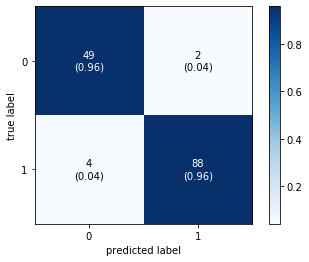

In [51]:
print(color.BLUE+' BEST CONFIGURATION ON TEST:'+color.END)
pca=PCA(n_components=5)
pca.fit(X_train_z)
X_z=pca.transform(X_train_z)
X_t_z=pca.transform(X_test_z)
pca.fit(X_train_IQR)
X_IQR=pca.transform(X_train_IQR)
X_t_IQR=pca.transform(X_test_IQR)
#pca+z
classifier=SVC(**fbc33)
_,f33=test_task(X_z,y_train_z,X_t_z,y_test,classifier)
classifier=SVC(**fbc31)
_,f31=test_task(X_z,y_train_z,X_t_z,y_test,classifier,sampling='over',disp=False)
classifier=SVC(**fbc32)
_,f32=test_task(X_z,y_train_z,X_t_z,y_test,classifier,sampling='under',disp=False)
classifier=SVC(**fbc3)
_,f3=test_task(X_z,y_train_z,X_t_z,y_test,classifier,sampling='combined',disp=False)
#pca+IQR
classifier=SVC(**fbc13)
_,f13=test_task(X_IQR,y_train_IQR,X_t_IQR,y_test,classifier,disp=False)
classifier=SVC(**fbc11)
_,f11=test_task(X_IQR,y_train_IQR,X_t_IQR,y_test,classifier,sampling='over',disp=False)
classifier=SVC(**fbc12)
_,f12=test_task(X_IQR,y_train_IQR,X_t_IQR,y_test,classifier,sampling='under',disp=False)
classifier=SVC(**fbc1)
_,f1=test_task(X_IQR,y_train_IQR,X_t_IQR,y_test,classifier,sampling='combined',disp=False)
#IQR+FS
classifier=SVC(**fbc03)
_,f03=test_task(X_train_IQR_fs,y_train_IQR,X_test_IQR_fs,y_test,classifier,disp=False)
classifier=SVC(**fbc01)
_,f01=test_task(X_train_IQR_fs,y_train_IQR,X_test_IQR_fs,y_test,classifier,sampling='over',disp=False)
classifier=SVC(**fbc02)
_,f02=test_task(X_train_IQR_fs,y_train_IQR,X_test_IQR_fs,y_test,classifier,sampling='under',disp=False)
classifier=SVC(**fbc0)
_,f0=test_task(X_train_IQR_fs,y_train_IQR,X_test_IQR_fs,y_test,classifier,sampling='combined',disp=False)
#z+FS
classifier=SVC(**fbc21)
_,f23=test_task(X_train_z_fs,y_train_z,X_test_z_fs,y_test,classifier,disp=False)
classifier=SVC(**fbc21)
_,f21=test_task(X_train_z_fs,y_train_z,X_test_z_fs,y_test,classifier,sampling='over',disp=False)
classifier=SVC(**fbc22)
_,f22=test_task(X_train_z_fs,y_train_z,X_test_z_fs,y_test,classifier,sampling='under',disp=False)
classifier=SVC(**fbc2)
_,f2=test_task(X_train_z_fs,y_train_z,X_test_z_fs,y_test,classifier,sampling='combined',disp=False)
#z-score only
classifier=SVC(**fbc51)
_,f53=test_task(X_train_z,y_train_z,X_test_z,y_test,classifier,disp=False)
classifier=SVC(**fbc51)
_,f51=test_task(X_train_z,y_train_z,X_test_z,y_test,classifier,sampling='over',disp=False)
classifier=SVC(**fbc52)
_,f52=test_task(X_train_z,y_train_z,X_test_z,y_test,classifier,sampling='under',disp=False)
classifier=SVC(**fbc5)
_,f5=test_task(X_train_z,y_train_z,X_test_z,y_test,classifier,sampling='combined',disp=False)
#IQR only
classifier=SVC(**fbc41)
_,f43=test_task(X_train_IQR,y_train_IQR,X_test_IQR,y_test,classifier,disp=False)
classifier=SVC(**fbc41)
_,f41=test_task(X_train_IQR,y_train_IQR,X_test_IQR,y_test,classifier,sampling='over',disp=False)
classifier=SVC(**fbc42)
_,f42=test_task(X_train_IQR,y_train_IQR,X_test_IQR,y_test,classifier,sampling='under',disp=False)
classifier=SVC(**fbc4)
_,f4=test_task(X_train_IQR,y_train_IQR,X_test_IQR,y_test,classifier,sampling='combined',disp=False)

d={'IQR + PCA': [f11,f12,f1,f13],'IQR + F.S.': [f01,f02,f0,f03],'Z-SCORE + PCA': [f31,f32,f3,f33],'Z-SCORE + F.S.': [f21,f22,f2,f23],'Z-SCORE':[f51,f52,f5,f53],'IQR':[f41,f42,f4,f43]}
indexes=['oversampling','undersampling','combined','no-resampling']
cols=['IQR','IQR + PCA','IQR + F.S.','Z-SCORE','Z-SCORE + PCA', 'Z-SCORE + F.S.']




The SVM works better with the PCA and the linear kernel. We have seen from the 3d graph that the points are pretty well separeted also in a lower dimensional space (we use 5 components in this phase), and indeed it achieve a good accuracy also on the test set.

### Results for all the combinations on the test set 

In [52]:
pd.DataFrame(index=indexes,columns=cols,data=d )

,IQR,IQR + PCA,IQR + F.S.,Z-SCORE,Z-SCORE + PCA,Z-SCORE + F.S.
oversampling,0.966,0.966,0.966,0.983,0.966,0.972
undersampling,0.966,0.960,0.924,0.967,0.972,0.972
combined,0.955,0.933,0.972,0.989,0.966,0.978
no-resampling,0.957,0.973,0.947,0.989,0.967,0.983


# Decision Tree <a class="anchor" id="section_11_3"></a>
We have seen the structure of this algorithm in the feature selection section, now we will use it for the classification task and to compare it to the other classifiers

### Results Decision Tree 

In [53]:
classifier=DecisionTreeClassifier()
params={'max_depth':[4,6,8,10,12],'random_state':[42]}
fbc0,fv0=tr_val_eval(X_train_IQR_fs,y_train_IQR,X_test_IQR_fs,y_test,classifier,params,pca=False,outl=' IQR')
fbc1,fv1=tr_val_eval(X_train_IQR,y_train_IQR,X_test_IQR,y_test,classifier,params,pca=True,outl=' IQR')
fbc2,fv2=tr_val_eval(X_train_z_fs,y_train_z,X_test_z_fs,y_test,classifier,params,pca=False,outl=' z')
fbc3,fv3=tr_val_eval(X_train_z,y_train_z,X_test_z,y_test,classifier,params,pca=True,outl=' z')
fbc4,fv4=tr_val_eval(X_train_IQR,y_train_IQR,X_test_IQR,y_test,classifier,params,pca=False,outl=' IQR')
fbc5,fv5=tr_val_eval(X_train_z,y_train_z,X_test_z,y_test,classifier,params,pca=False,outl=' z')

fbc01,fv01=tr_val_eval1(X_train_IQR_fs,y_train_IQR,X_test_IQR_fs,y_test,classifier,params,pca=False,outl=' IQR')
fbc11,fv11=tr_val_eval1(X_train_IQR,y_train_IQR,X_test_IQR,y_test,classifier,params,pca=True,outl=' IQR')
fbc21,fv21=tr_val_eval1(X_train_z_fs,y_train_z,X_test_z_fs,y_test,classifier,params,pca=False,outl=' z')
fbc31,fv31=tr_val_eval1(X_train_z,y_train_z,X_test_z,y_test,classifier,params,pca=True,outl=' z')
fbc41,fv41=tr_val_eval1(X_train_IQR,y_train_IQR,X_test_IQR,y_test,classifier,params,pca=False,outl=' IQR')
fbc51,fv51=tr_val_eval1(X_train_z,y_train_z,X_test_z,y_test,classifier,params,pca=False,outl=' z')

fbc02,fv02=tr_val_eval2(X_train_IQR_fs,y_train_IQR,X_test_IQR_fs,y_test,classifier,params,pca=False,outl=' IQR')
fbc12,fv12=tr_val_eval2(X_train_IQR,y_train_IQR,X_test_IQR,y_test,classifier,params,pca=True,outl=' IQR')
fbc22,fv22=tr_val_eval2(X_train_z_fs,y_train_z,X_test_z_fs,y_test,classifier,params,pca=False,outl=' z')
fbc32,fv32=tr_val_eval2(X_train_z,y_train_z,X_test_z,y_test,classifier,params,pca=True,outl=' z')
fbc42,fv42=tr_val_eval2(X_train_IQR,y_train_IQR,X_test_IQR,y_test,classifier,params,pca=False,outl=' IQR')
fbc52,fv52=tr_val_eval2(X_train_z,y_train_z,X_test_z,y_test,classifier,params,pca=False,outl=' z')

fbc03,fv03=tr_val_eval3(X_train_IQR_fs,y_train_IQR,X_test_IQR_fs,y_test,classifier,params,pca=False,outl=' IQR')
fbc13,fv13=tr_val_eval3(X_train_IQR,y_train_IQR,X_test_IQR,y_test,classifier,params,pca=True,outl=' IQR')
fbc23,fv23=tr_val_eval3(X_train_z_fs,y_train_z,X_test_z_fs,y_test,classifier,params,pca=False,outl=' z')
fbc33,fv33=tr_val_eval3(X_train_z,y_train_z,X_test_z,y_test,classifier,params,pca=True,outl=' z')
fbc43,fv43=tr_val_eval3(X_train_IQR,y_train_IQR,X_test_IQR,y_test,classifier,params,pca=False,outl=' IQR')
fbc53,fv53=tr_val_eval3(X_train_z,y_train_z,X_test_z,y_test,classifier,params,pca=False,outl=' z')

d={'IQR + PCA': [fv11,fv12,fv1,fv13],'IQR + F.S.': [fv01,fv02,fv0,fv03],'Z-SCORE + PCA': [fv31,fv32,fv3,fv33],'Z-SCORE + F.S.': [fv21,fv22,fv2,fv23],'Z-SCORE':[fv51,fv52,fv5,fv53],'IQR':[fv41,fv42,fv4,fv43]}
indexes=['oversampling','undersampling','combined','no-resampling']
cols=['IQR','IQR + PCA','IQR + F.S.','Z-SCORE','Z-SCORE + PCA', 'Z-SCORE + F.S.']
pd.DataFrame(index=indexes,columns=cols,data=d )

,IQR,IQR + PCA,IQR + F.S.,Z-SCORE,Z-SCORE + PCA,Z-SCORE + F.S.
oversampling,0.939386,0.935697,0.941505,0.949239,0.926778,0.946085
undersampling,0.954271,0.943405,0.952255,0.941721,0.967661,0.945038
combined,0.932150,0.933831,0.922387,0.937632,0.950880,0.949756
no-resampling,0.954819,0.941276,0.936978,0.953802,0.960777,0.947627


 BEST CONFIGURATION ON TEST:
f1: 0.933	recall: 0.933	precision: 0.933


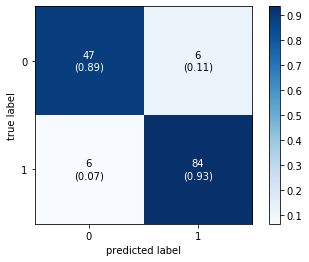

In [55]:
print(color.BLUE+' BEST CONFIGURATION ON TEST:'+color.END)
pca=PCA(n_components=5)
pca.fit(X_train_z)
X_z=pca.transform(X_train_z)
X_t_z=pca.transform(X_test_z)
pca.fit(X_train_IQR)
X_IQR=pca.transform(X_train_IQR)
X_t_IQR=pca.transform(X_test_IQR)
#pca+z
classifier=DecisionTreeClassifier(**fbc33)
_,f33=test_task(X_z,y_train_z,X_t_z,y_test,classifier,disp=False)
classifier=DecisionTreeClassifier(**fbc31)
_,f31=test_task(X_z,y_train_z,X_t_z,y_test,classifier,sampling='over',disp=False)
classifier=DecisionTreeClassifier(**fbc32)
_,f32=test_task(X_z,y_train_z,X_t_z,y_test,classifier,sampling='under')
classifier=DecisionTreeClassifier(**fbc3)
_,f3=test_task(X_z,y_train_z,X_t_z,y_test,classifier,sampling='combined',disp=False)
#pca+IQR
classifier=DecisionTreeClassifier(**fbc13)
_,f13=test_task(X_IQR,y_train_IQR,X_t_IQR,y_test,classifier,disp=False)
classifier=DecisionTreeClassifier(**fbc11)
_,f11=test_task(X_IQR,y_train_IQR,X_t_IQR,y_test,classifier,sampling='over',disp=False)
classifier=DecisionTreeClassifier(**fbc12)
_,f12=test_task(X_IQR,y_train_IQR,X_t_IQR,y_test,classifier,sampling='under',disp=False)
classifier=DecisionTreeClassifier(**fbc1)
_,f1=test_task(X_IQR,y_train_IQR,X_t_IQR,y_test,classifier,sampling='combined',disp=False)
#IQR+FS
classifier=DecisionTreeClassifier(**fbc03)
_,f03=test_task(X_train_IQR_fs,y_train_IQR,X_test_IQR_fs,y_test,classifier,disp=False)
classifier=DecisionTreeClassifier(**fbc01)
_,f01=test_task(X_train_IQR_fs,y_train_IQR,X_test_IQR_fs,y_test,classifier,sampling='over',disp=False)
classifier=DecisionTreeClassifier(**fbc02)
_,f02=test_task(X_train_IQR_fs,y_train_IQR,X_test_IQR_fs,y_test,classifier,sampling='under',disp=False)
classifier=DecisionTreeClassifier(**fbc0)
_,f0=test_task(X_train_IQR_fs,y_train_IQR,X_test_IQR_fs,y_test,classifier,sampling='combined',disp=False)
#z+FS
classifier=DecisionTreeClassifier(**fbc21)
_,f23=test_task(X_train_z_fs,y_train_z,X_test_z_fs,y_test,classifier,disp=False)
classifier=DecisionTreeClassifier(**fbc21)
_,f21=test_task(X_train_z_fs,y_train_z,X_test_z_fs,y_test,classifier,sampling='over',disp=False)
classifier=DecisionTreeClassifier(**fbc22)
_,f22=test_task(X_train_z_fs,y_train_z,X_test_z_fs,y_test,classifier,sampling='under',disp=False)
classifier=DecisionTreeClassifier(**fbc2)
_,f2=test_task(X_train_z_fs,y_train_z,X_test_z_fs,y_test,classifier,sampling='combined',disp=False)
#z-score only
classifier=DecisionTreeClassifier(**fbc51)
_,f53=test_task(X_train_z,y_train_z,X_test_z,y_test,classifier,disp=False)
classifier=DecisionTreeClassifier(**fbc51)
_,f51=test_task(X_train_z,y_train_z,X_test_z,y_test,classifier,sampling='over',disp=False)
classifier=DecisionTreeClassifier(**fbc52)
_,f52=test_task(X_train_z,y_train_z,X_test_z,y_test,classifier,sampling='under',disp=False)
classifier=DecisionTreeClassifier(**fbc5)
_,f5=test_task(X_train_z,y_train_z,X_test_z,y_test,classifier,sampling='combined',disp=False)
#IQR only
classifier=DecisionTreeClassifier(**fbc41)
_,f43=test_task(X_train_IQR,y_train_IQR,X_test_IQR,y_test,classifier,disp=False)
classifier=DecisionTreeClassifier(**fbc41)
_,f41=test_task(X_train_IQR,y_train_IQR,X_test_IQR,y_test,classifier,sampling='over',disp=False)
classifier=DecisionTreeClassifier(**fbc42)
_,f42=test_task(X_train_IQR,y_train_IQR,X_test_IQR,y_test,classifier,sampling='under',disp=False)
classifier=DecisionTreeClassifier(**fbc4)
_,f4=test_task(X_train_IQR,y_train_IQR,X_test_IQR,y_test,classifier,sampling='combined',disp=False)

d={'IQR + PCA': [f11,f12,f1,f13],'IQR + F.S.': [f01,f02,f0,f03],'Z-SCORE + PCA': [f31,f32,f3,f33],'Z-SCORE + F.S.': [f21,f22,f2,f23],'Z-SCORE':[f51,f52,f5,f53],'IQR':[f41,f42,f4,f43]}
indexes=['oversampling','undersampling','combined','no-resampling']
cols=['IQR','IQR + PCA','IQR + F.S.','Z-SCORE','Z-SCORE + PCA', 'Z-SCORE + F.S.']




### Results for all the combinations on the test set 

In [56]:
pd.DataFrame(index=indexes,columns=cols,data=d )

,IQR,IQR + PCA,IQR + F.S.,Z-SCORE,Z-SCORE + PCA,Z-SCORE + F.S.
oversampling,0.917,0.855,0.897,0.932,0.933,0.967
undersampling,0.924,0.937,0.939,0.903,0.933,0.955
combined,0.923,0.871,0.903,0.908,0.960,0.939
no-resampling,0.893,0.900,0.916,0.927,0.939,0.939


In [32]:
#CODE FOR PLOTTING THE DECISION TREE REQUIRES GRAPHVIZ 
#Export as dot file
rf=DecisionTreeClassifier(max_depth=4,random_state=42)
rf.fit(X_train_z,y_train_z)
export_graphviz(rf, out_file='tree1.dot',feature_names = X_train_z.columns,class_names =['Malignant','Benign'],rounded = True, proportion = False,precision = 2, filled = True)

We can plot the structure of the decision tree created to see how the features are able to split the two classes.
The following tree is constructed on the dataset without the pca and z-score for the outliers detection, because it's more interesting to see the behaviour of meaningful attributes instead of the meaningless principal components.
![](https://drive.google.com/uc?export=view&id=1owjkKetRjwX4Pjegwm1UXxTUTSuDl33D)

## Bagging and Random Forest <a class="anchor" id="section_11_4"></a>

Aggregating many decision trees can improve the performance of a tree. One way to improve the performance of a decision tree is the bootstrap aggregation or bagging, it is an algorithm designed to improve the stability and reduce the variance of a statistical learning method.

We generate B different bootstrapped training data sets. We then train our method on the b th bootstrapped training set in order to get $\hat{f}^{*b}(x),$ the prediction at a point x. We then average all the predictions to obtain $\hat{f}_{bag}(x)=1/B \sum_{b=1}^B \hat{f}^{*b}(x)$ in the case of the regression, instead for classification trees, we record the class predicted by each of the B trees and take a majority vote.

I also talked about the random forest that is an ensemble method, but adds to the bagging, a trick to decorrelate the trees: for each split in a tree, only one from a random selection of m predictors of the full set of p predictors is chosen as split candidates. Thus every time we have a fresh selection of m predictors.


### Results Bagging

In [57]:
classifier=BaggingClassifier()
params={'n_estimators':[50,100,200],'random_state':[42]}
fbc0,fv0=tr_val_eval(X_train_IQR_fs,y_train_IQR,X_test_IQR_fs,y_test,classifier,params,pca=False,outl=' IQR')
fbc1,fv1=tr_val_eval(X_train_IQR,y_train_IQR,X_test_IQR,y_test,classifier,params,pca=True,outl=' IQR')
fbc2,fv2=tr_val_eval(X_train_z_fs,y_train_z,X_test_z_fs,y_test,classifier,params,pca=False,outl=' z')
fbc3,fv3=tr_val_eval(X_train_z,y_train_z,X_test_z,y_test,classifier,params,pca=True,outl=' z')
fbc4,fv4=tr_val_eval(X_train_IQR,y_train_IQR,X_test_IQR,y_test,classifier,params,pca=False,outl=' IQR')
fbc5,fv5=tr_val_eval(X_train_z,y_train_z,X_test_z,y_test,classifier,params,pca=False,outl=' z')

fbc01,fv01=tr_val_eval1(X_train_IQR_fs,y_train_IQR,X_test_IQR_fs,y_test,classifier,params,pca=False,outl=' IQR')
fbc11,fv11=tr_val_eval1(X_train_IQR,y_train_IQR,X_test_IQR,y_test,classifier,params,pca=True,outl=' IQR')
fbc21,fv21=tr_val_eval1(X_train_z_fs,y_train_z,X_test_z_fs,y_test,classifier,params,pca=False,outl=' z')
fbc31,fv31=tr_val_eval1(X_train_z,y_train_z,X_test_z,y_test,classifier,params,pca=True,outl=' z')
fbc41,fv41=tr_val_eval1(X_train_IQR,y_train_IQR,X_test_IQR,y_test,classifier,params,pca=False,outl=' IQR')
fbc51,fv51=tr_val_eval1(X_train_z,y_train_z,X_test_z,y_test,classifier,params,pca=False,outl=' z')

fbc02,fv02=tr_val_eval2(X_train_IQR_fs,y_train_IQR,X_test_IQR_fs,y_test,classifier,params,pca=False,outl=' IQR')
fbc12,fv12=tr_val_eval2(X_train_IQR,y_train_IQR,X_test_IQR,y_test,classifier,params,pca=True,outl=' IQR')
fbc22,fv22=tr_val_eval2(X_train_z_fs,y_train_z,X_test_z_fs,y_test,classifier,params,pca=False,outl=' z')
fbc32,fv32=tr_val_eval2(X_train_z,y_train_z,X_test_z,y_test,classifier,params,pca=True,outl=' z')
fbc42,fv42=tr_val_eval2(X_train_IQR,y_train_IQR,X_test_IQR,y_test,classifier,params,pca=False,outl=' IQR')
fbc52,fv52=tr_val_eval2(X_train_z,y_train_z,X_test_z,y_test,classifier,params,pca=False,outl=' z')

fbc03,fv03=tr_val_eval3(X_train_IQR_fs,y_train_IQR,X_test_IQR_fs,y_test,classifier,params,pca=False,outl=' IQR')
fbc13,fv13=tr_val_eval3(X_train_IQR,y_train_IQR,X_test_IQR,y_test,classifier,params,pca=True,outl=' IQR')
fbc23,fv23=tr_val_eval3(X_train_z_fs,y_train_z,X_test_z_fs,y_test,classifier,params,pca=False,outl=' z')
fbc33,fv33=tr_val_eval3(X_train_z,y_train_z,X_test_z,y_test,classifier,params,pca=True,outl=' z')
fbc43,fv43=tr_val_eval3(X_train_IQR,y_train_IQR,X_test_IQR,y_test,classifier,params,pca=False,outl=' IQR')
fbc53,fv53=tr_val_eval3(X_train_z,y_train_z,X_test_z,y_test,classifier,params,pca=False,outl=' z')

d={'IQR + PCA': [fv11,fv12,fv1,fv13],'IQR + F.S.': [fv01,fv02,fv0,fv03],'Z-SCORE + PCA': [fv31,fv32,fv3,fv33],'Z-SCORE + F.S.': [fv21,fv22,fv2,fv23],'Z-SCORE':[fv51,fv52,fv5,fv53],'IQR':[fv41,fv42,fv4,fv43]}
indexes=['oversampling','undersampling','combined','no-resampling']
cols=['IQR','IQR + PCA','IQR + F.S.','Z-SCORE','Z-SCORE + PCA', 'Z-SCORE + F.S.']
pd.DataFrame(index=indexes,columns=cols,data=d )

,IQR,IQR + PCA,IQR + F.S.,Z-SCORE,Z-SCORE + PCA,Z-SCORE + F.S.
oversampling,0.960015,0.947289,0.948024,0.958454,0.947879,0.958081
undersampling,0.968073,0.961378,0.948039,0.952959,0.971872,0.963454
combined,0.956251,0.944651,0.949450,0.946757,0.969877,0.951471
no-resampling,0.963659,0.955639,0.970719,0.961590,0.973969,0.967943


 BEST CONFIGURATION ON TEST:
f1: 0.95	recall: 0.945	precision: 0.956


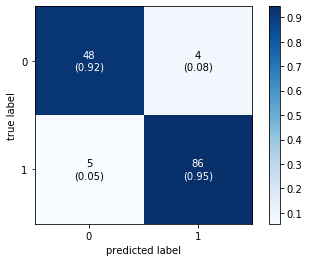

In [58]:
print(color.BLUE+' BEST CONFIGURATION ON TEST:'+color.END)
pca=PCA(n_components=5)
pca.fit(X_train_z)
X_z=pca.transform(X_train_z)
X_t_z=pca.transform(X_test_z)
pca.fit(X_train_IQR)
X_IQR=pca.transform(X_train_IQR)
X_t_IQR=pca.transform(X_test_IQR)
#pca+z
classifier=BaggingClassifier(**fbc33)
_,f33=test_task(X_z,y_train_z,X_t_z,y_test,classifier)
classifier=BaggingClassifier(**fbc31)
_,f31=test_task(X_z,y_train_z,X_t_z,y_test,classifier,sampling='over',disp=False)
classifier=BaggingClassifier(**fbc32)
_,f32=test_task(X_z,y_train_z,X_t_z,y_test,classifier,sampling='under',disp=False)
classifier=BaggingClassifier(**fbc3)
_,f3=test_task(X_z,y_train_z,X_t_z,y_test,classifier,sampling='combined',disp=False)
#pca+IQR
classifier=BaggingClassifier(**fbc13)
_,f13=test_task(X_IQR,y_train_IQR,X_t_IQR,y_test,classifier,disp=False)
classifier=BaggingClassifier(**fbc11)
_,f11=test_task(X_IQR,y_train_IQR,X_t_IQR,y_test,classifier,sampling='over',disp=False)
classifier=BaggingClassifier(**fbc12)
_,f12=test_task(X_IQR,y_train_IQR,X_t_IQR,y_test,classifier,sampling='under',disp=False)
classifier=BaggingClassifier(**fbc1)
_,f1=test_task(X_IQR,y_train_IQR,X_t_IQR,y_test,classifier,sampling='combined',disp=False)
#IQR+FS
classifier=BaggingClassifier(**fbc03)
_,f03=test_task(X_train_IQR_fs,y_train_IQR,X_test_IQR_fs,y_test,classifier,disp=False)
classifier=BaggingClassifier(**fbc01)
_,f01=test_task(X_train_IQR_fs,y_train_IQR,X_test_IQR_fs,y_test,classifier,sampling='over',disp=False)
classifier=BaggingClassifier(**fbc02)
_,f02=test_task(X_train_IQR_fs,y_train_IQR,X_test_IQR_fs,y_test,classifier,sampling='under',disp=False)
classifier=BaggingClassifier(**fbc0)
_,f0=test_task(X_train_IQR_fs,y_train_IQR,X_test_IQR_fs,y_test,classifier,sampling='combined',disp=False)
#z+FS
classifier=BaggingClassifier(**fbc21)
_,f23=test_task(X_train_z_fs,y_train_z,X_test_z_fs,y_test,classifier,disp=False)
classifier=BaggingClassifier(**fbc21)
_,f21=test_task(X_train_z_fs,y_train_z,X_test_z_fs,y_test,classifier,sampling='over',disp=False)
classifier=BaggingClassifier(**fbc22)
_,f22=test_task(X_train_z_fs,y_train_z,X_test_z_fs,y_test,classifier,sampling='under',disp=False)
classifier=BaggingClassifier(**fbc2)
_,f2=test_task(X_train_z_fs,y_train_z,X_test_z_fs,y_test,classifier,sampling='combined',disp=False)
#z-score only
classifier=BaggingClassifier(**fbc51)
_,f53=test_task(X_train_z,y_train_z,X_test_z,y_test,classifier,disp=False)
classifier=BaggingClassifier(**fbc51)
_,f51=test_task(X_train_z,y_train_z,X_test_z,y_test,classifier,sampling='over',disp=False)
classifier=BaggingClassifier(**fbc52)
_,f52=test_task(X_train_z,y_train_z,X_test_z,y_test,classifier,sampling='under',disp=False)
classifier=BaggingClassifier(**fbc5)
_,f5=test_task(X_train_z,y_train_z,X_test_z,y_test,classifier,sampling='combined',disp=False)
#IQR only
classifier=BaggingClassifier(**fbc41)
_,f43=test_task(X_train_IQR,y_train_IQR,X_test_IQR,y_test,classifier,disp=False)
classifier=BaggingClassifier(**fbc41)
_,f41=test_task(X_train_IQR,y_train_IQR,X_test_IQR,y_test,classifier,sampling='over',disp=False)
classifier=BaggingClassifier(**fbc42)
_,f42=test_task(X_train_IQR,y_train_IQR,X_test_IQR,y_test,classifier,sampling='under',disp=False)
classifier=BaggingClassifier(**fbc4)
_,f4=test_task(X_train_IQR,y_train_IQR,X_test_IQR,y_test,classifier,sampling='combined',disp=False)

d={'IQR + PCA': [f11,f12,f1,f13],'IQR + F.S.': [f01,f02,f0,f03],'Z-SCORE + PCA': [f31,f32,f3,f33],'Z-SCORE + F.S.': [f21,f22,f2,f23],'Z-SCORE':[f51,f52,f5,f53],'IQR':[f41,f42,f4,f43]}
indexes=['oversampling','undersampling','combined','no-resampling']
cols=['IQR','IQR + PCA','IQR + F.S.','Z-SCORE','Z-SCORE + PCA', 'Z-SCORE + F.S.']




### Results for all the combinations on the test set

In [59]:
pd.DataFrame(index=indexes,columns=cols,data=d )

,IQR,IQR + PCA,IQR + F.S.,Z-SCORE,Z-SCORE + PCA,Z-SCORE + F.S.
oversampling,0.966,0.925,0.948,0.949,0.961,0.950
undersampling,0.954,0.911,0.948,0.949,0.949,0.936
combined,0.960,0.930,0.930,0.949,0.967,0.956
no-resampling,0.961,0.950,0.967,0.956,0.950,0.961


As the results prove the bagging improve the performance of the decision tree, but they are under the results of the SVM and the Logistic Regressor

### Results Random Forest

In [60]:
classifier=RandomForestClassifier()
params={'n_estimators':[50,100,200],'max_depth':[4,6,8,10],'random_state':[42]}
fbc0,fv0=tr_val_eval(X_train_IQR_fs,y_train_IQR,X_test_IQR_fs,y_test,classifier,params,pca=False,outl=' IQR')
fbc1,fv1=tr_val_eval(X_train_IQR,y_train_IQR,X_test_IQR,y_test,classifier,params,pca=True,outl=' IQR')
fbc2,fv2=tr_val_eval(X_train_z_fs,y_train_z,X_test_z_fs,y_test,classifier,params,pca=False,outl=' z')
fbc3,fv3=tr_val_eval(X_train_z,y_train_z,X_test_z,y_test,classifier,params,pca=True,outl=' z')
fbc4,fv4=tr_val_eval(X_train_IQR,y_train_IQR,X_test_IQR,y_test,classifier,params,pca=False,outl=' IQR')
fbc5,fv5=tr_val_eval(X_train_z,y_train_z,X_test_z,y_test,classifier,params,pca=False,outl=' z')

fbc01,fv01=tr_val_eval1(X_train_IQR_fs,y_train_IQR,X_test_IQR_fs,y_test,classifier,params,pca=False,outl=' IQR')
fbc11,fv11=tr_val_eval1(X_train_IQR,y_train_IQR,X_test_IQR,y_test,classifier,params,pca=True,outl=' IQR')
fbc21,fv21=tr_val_eval1(X_train_z_fs,y_train_z,X_test_z_fs,y_test,classifier,params,pca=False,outl=' z')
fbc31,fv31=tr_val_eval1(X_train_z,y_train_z,X_test_z,y_test,classifier,params,pca=True,outl=' z')
fbc41,fv41=tr_val_eval1(X_train_IQR,y_train_IQR,X_test_IQR,y_test,classifier,params,pca=False,outl=' IQR')
fbc51,fv51=tr_val_eval1(X_train_z,y_train_z,X_test_z,y_test,classifier,params,pca=False,outl=' z')

fbc02,fv02=tr_val_eval2(X_train_IQR_fs,y_train_IQR,X_test_IQR_fs,y_test,classifier,params,pca=False,outl=' IQR')
fbc12,fv12=tr_val_eval2(X_train_IQR,y_train_IQR,X_test_IQR,y_test,classifier,params,pca=True,outl=' IQR')
fbc22,fv22=tr_val_eval2(X_train_z_fs,y_train_z,X_test_z_fs,y_test,classifier,params,pca=False,outl=' z')
fbc32,fv32=tr_val_eval2(X_train_z,y_train_z,X_test_z,y_test,classifier,params,pca=True,outl=' z')
fbc42,fv42=tr_val_eval2(X_train_IQR,y_train_IQR,X_test_IQR,y_test,classifier,params,pca=False,outl=' IQR')
fbc52,fv52=tr_val_eval2(X_train_z,y_train_z,X_test_z,y_test,classifier,params,pca=False,outl=' z')

fbc03,fv03=tr_val_eval3(X_train_IQR_fs,y_train_IQR,X_test_IQR_fs,y_test,classifier,params,pca=False,outl=' IQR')
fbc13,fv13=tr_val_eval3(X_train_IQR,y_train_IQR,X_test_IQR,y_test,classifier,params,pca=True,outl=' IQR')
fbc23,fv23=tr_val_eval3(X_train_z_fs,y_train_z,X_test_z_fs,y_test,classifier,params,pca=False,outl=' z')
fbc33,fv33=tr_val_eval3(X_train_z,y_train_z,X_test_z,y_test,classifier,params,pca=True,outl=' z')
fbc43,fv43=tr_val_eval3(X_train_IQR,y_train_IQR,X_test_IQR,y_test,classifier,params,pca=False,outl=' IQR')
fbc53,fv53=tr_val_eval3(X_train_z,y_train_z,X_test_z,y_test,classifier,params,pca=False,outl=' z')

d={'IQR + PCA': [fv11,fv12,fv1,fv13],'IQR + F.S.': [fv01,fv02,fv0,fv03],'Z-SCORE + PCA': [fv31,fv32,fv3,fv33],'Z-SCORE + F.S.': [fv21,fv22,fv2,fv23],'Z-SCORE':[fv51,fv52,fv5,fv53],'IQR':[fv41,fv42,fv4,fv43]}
indexes=['oversampling','undersampling','combined','no-resampling']
cols=['IQR','IQR + PCA','IQR + F.S.','Z-SCORE','Z-SCORE + PCA', 'Z-SCORE + F.S.']
pd.DataFrame(index=indexes,columns=cols,data=d )

,IQR,IQR + PCA,IQR + F.S.,Z-SCORE,Z-SCORE + PCA,Z-SCORE + F.S.
oversampling,0.949682,0.960052,0.955175,0.960538,0.968920,0.957058
undersampling,0.979821,0.972912,0.965432,0.969724,0.975622,0.963618
combined,0.965229,0.960416,0.957696,0.961132,0.971499,0.965649
no-resampling,0.966359,0.969205,0.975316,0.969623,0.973838,0.965925


 BEST CONFIGURATION ON TEST:
f1: 0.96	recall: 0.988	precision: 0.933


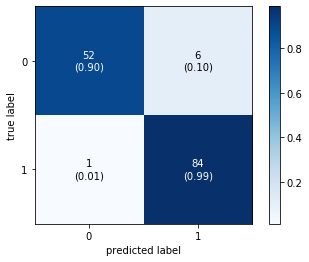

In [61]:
print(color.BLUE+' BEST CONFIGURATION ON TEST:'+color.END)
pca=PCA(n_components=5)
pca.fit(X_train_z)
X_z=pca.transform(X_train_z)
X_t_z=pca.transform(X_test_z)
pca.fit(X_train_IQR)
X_IQR=pca.transform(X_train_IQR)
X_t_IQR=pca.transform(X_test_IQR)
#pca+z
classifier=RandomForestClassifier(**fbc33)
_,f33=test_task(X_z,y_train_z,X_t_z,y_test,classifier,disp=False)
classifier=RandomForestClassifier(**fbc31)
_,f31=test_task(X_z,y_train_z,X_t_z,y_test,classifier,sampling='over',disp=False)
classifier=RandomForestClassifier(**fbc32)
_,f32=test_task(X_z,y_train_z,X_t_z,y_test,classifier,sampling='under',disp=False)
classifier=RandomForestClassifier(**fbc3)
_,f3=test_task(X_z,y_train_z,X_t_z,y_test,classifier,sampling='combined',disp=False)
#pca+IQR
classifier=RandomForestClassifier(**fbc13)
_,f13=test_task(X_IQR,y_train_IQR,X_t_IQR,y_test,classifier,disp=False)
classifier=RandomForestClassifier(**fbc11)
_,f11=test_task(X_IQR,y_train_IQR,X_t_IQR,y_test,classifier,sampling='over',disp=False)
classifier=RandomForestClassifier(**fbc12)
_,f12=test_task(X_IQR,y_train_IQR,X_t_IQR,y_test,classifier,sampling='under',disp=False)
classifier=RandomForestClassifier(**fbc1)
_,f1=test_task(X_IQR,y_train_IQR,X_t_IQR,y_test,classifier,sampling='combined',disp=False)
#IQR+FS
classifier=RandomForestClassifier(**fbc03)
_,f03=test_task(X_train_IQR_fs,y_train_IQR,X_test_IQR_fs,y_test,classifier,disp=False)
classifier=RandomForestClassifier(**fbc01)
_,f01=test_task(X_train_IQR_fs,y_train_IQR,X_test_IQR_fs,y_test,classifier,sampling='over',disp=False)
classifier=RandomForestClassifier(**fbc02)
_,f02=test_task(X_train_IQR_fs,y_train_IQR,X_test_IQR_fs,y_test,classifier,sampling='under',disp=False)
classifier=RandomForestClassifier(**fbc0)
_,f0=test_task(X_train_IQR_fs,y_train_IQR,X_test_IQR_fs,y_test,classifier,sampling='combined',disp=False)
#z+FS
classifier=RandomForestClassifier(**fbc21)
_,f23=test_task(X_train_z_fs,y_train_z,X_test_z_fs,y_test,classifier,disp=False)
classifier=RandomForestClassifier(**fbc21)
_,f21=test_task(X_train_z_fs,y_train_z,X_test_z_fs,y_test,classifier,sampling='over',disp=False)
classifier=RandomForestClassifier(**fbc22)
_,f22=test_task(X_train_z_fs,y_train_z,X_test_z_fs,y_test,classifier,sampling='under',disp=False)
classifier=RandomForestClassifier(**fbc2)
_,f2=test_task(X_train_z_fs,y_train_z,X_test_z_fs,y_test,classifier,sampling='combined',disp=False)
#z-score only
classifier=RandomForestClassifier(**fbc51)
_,f53=test_task(X_train_z,y_train_z,X_test_z,y_test,classifier,disp=False)
classifier=RandomForestClassifier(**fbc51)
_,f51=test_task(X_train_z,y_train_z,X_test_z,y_test,classifier,sampling='over',disp=False)
classifier=RandomForestClassifier(**fbc52)
_,f52=test_task(X_train_z,y_train_z,X_test_z,y_test,classifier,sampling='under',disp=False)
classifier=RandomForestClassifier(**fbc5)
_,f5=test_task(X_train_z,y_train_z,X_test_z,y_test,classifier,sampling='combined',disp=False)
#IQR only
classifier=RandomForestClassifier(**fbc41)
_,f43=test_task(X_train_IQR,y_train_IQR,X_test_IQR,y_test,classifier,disp=False)
classifier=RandomForestClassifier(**fbc41)
_,f41=test_task(X_train_IQR,y_train_IQR,X_test_IQR,y_test,classifier,sampling='over',disp=False)
classifier=RandomForestClassifier(**fbc42)
_,f42=test_task(X_train_IQR,y_train_IQR,X_test_IQR,y_test,classifier,sampling='under')
classifier=RandomForestClassifier(**fbc4)
_,f4=test_task(X_train_IQR,y_train_IQR,X_test_IQR,y_test,classifier,sampling='combined',disp=False)

d={'IQR + PCA': [f11,f12,f1,f13],'IQR + F.S.': [f01,f02,f0,f03],'Z-SCORE + PCA': [f31,f32,f3,f33],'Z-SCORE + F.S.': [f21,f22,f2,f23],'Z-SCORE':[f51,f52,f5,f53],'IQR':[f41,f42,f4,f43]}
indexes=['oversampling','undersampling','combined','no-resampling']
cols=['IQR','IQR + PCA','IQR + F.S.','Z-SCORE','Z-SCORE + PCA', 'Z-SCORE + F.S.']




### Results for all the configurations on the test set.

In [62]:
pd.DataFrame(index=indexes,columns=cols,data=d )

,IQR,IQR + PCA,IQR + F.S.,Z-SCORE,Z-SCORE + PCA,Z-SCORE + F.S.
oversampling,0.966,0.943,0.966,0.960,0.961,0.972
undersampling,0.960,0.937,0.954,0.966,0.950,0.955
combined,0.960,0.943,0.949,0.961,0.961,0.978
no-resampling,0.967,0.950,0.967,0.967,0.956,0.967


The random forest as we can see gives a further push to the basic decision tree due to the decorrelation of the trees.

## Boosting: AdaBoost <a class="anchor" id="section_11_5"></a>
The main hypothesis behind boosting is that when weak models are correctly combined we can obtain more accurate and/or robust models, where a weak learner is defined to be a classifier that is only slightly correlated with the true classification (it can label examples better than random guessing).

Boosting is a general approach that can be applied to many statistical learning methods for regression or classification as it is the bagging. It is a technique that consists in fitting sequentially multiple weak learners in a very adaptative way: each model in the sequence is fitted giving more importance to observations in the dataset that were badly handled by the previous models in the sequence. Intuitively, each new model focus its efforts on the most difficult observations to fit up to now, so that we obtain, at the end of the process, a strong learner with lower bias.
A pratical exemple algorithm for the boosting is AdaBoost that stands for adaptive boosting.

### AdaBoost Algorithm
![](https://d3i71xaburhd42.cloudfront.net/2a21af8a8285162ab438bee94c8e5bcdcc52556c/2-Figure1-1.png)

### Results AdaBoost

In [63]:
classifier=AdaBoostClassifier()
params={'learning_rate': [1,1.5],'n_estimators':[10,50,100],'random_state':[42]}
fbc0,fv0=tr_val_eval(X_train_IQR_fs,y_train_IQR,X_test_IQR_fs,y_test,classifier,params,pca=False,outl=' IQR')
fbc1,fv1=tr_val_eval(X_train_IQR,y_train_IQR,X_test_IQR,y_test,classifier,params,pca=True,outl=' IQR')
fbc2,fv2=tr_val_eval(X_train_z_fs,y_train_z,X_test_z_fs,y_test,classifier,params,pca=False,outl=' z')
fbc3,fv3=tr_val_eval(X_train_z,y_train_z,X_test_z,y_test,classifier,params,pca=True,outl=' z')
fbc4,fv4=tr_val_eval(X_train_IQR,y_train_IQR,X_test_IQR,y_test,classifier,params,pca=False,outl=' IQR')
fbc5,fv5=tr_val_eval(X_train_z,y_train_z,X_test_z,y_test,classifier,params,pca=False,outl=' z')

fbc01,fv01=tr_val_eval1(X_train_IQR_fs,y_train_IQR,X_test_IQR_fs,y_test,classifier,params,pca=False,outl=' IQR')
fbc11,fv11=tr_val_eval1(X_train_IQR,y_train_IQR,X_test_IQR,y_test,classifier,params,pca=True,outl=' IQR')
fbc21,fv21=tr_val_eval1(X_train_z_fs,y_train_z,X_test_z_fs,y_test,classifier,params,pca=False,outl=' z')
fbc31,fv31=tr_val_eval1(X_train_z,y_train_z,X_test_z,y_test,classifier,params,pca=True,outl=' z')
fbc41,fv41=tr_val_eval1(X_train_IQR,y_train_IQR,X_test_IQR,y_test,classifier,params,pca=False,outl=' IQR')
fbc51,fv51=tr_val_eval1(X_train_z,y_train_z,X_test_z,y_test,classifier,params,pca=False,outl=' z')

fbc02,fv02=tr_val_eval2(X_train_IQR_fs,y_train_IQR,X_test_IQR_fs,y_test,classifier,params,pca=False,outl=' IQR')
fbc12,fv12=tr_val_eval2(X_train_IQR,y_train_IQR,X_test_IQR,y_test,classifier,params,pca=True,outl=' IQR')
fbc22,fv22=tr_val_eval2(X_train_z_fs,y_train_z,X_test_z_fs,y_test,classifier,params,pca=False,outl=' z')
fbc32,fv32=tr_val_eval2(X_train_z,y_train_z,X_test_z,y_test,classifier,params,pca=True,outl=' z')
fbc42,fv42=tr_val_eval2(X_train_IQR,y_train_IQR,X_test_IQR,y_test,classifier,params,pca=False,outl=' IQR')
fbc52,fv52=tr_val_eval2(X_train_z,y_train_z,X_test_z,y_test,classifier,params,pca=False,outl=' z')

fbc03,fv03=tr_val_eval3(X_train_IQR_fs,y_train_IQR,X_test_IQR_fs,y_test,classifier,params,pca=False,outl=' IQR')
fbc13,fv13=tr_val_eval3(X_train_IQR,y_train_IQR,X_test_IQR,y_test,classifier,params,pca=True,outl=' IQR')
fbc23,fv23=tr_val_eval3(X_train_z_fs,y_train_z,X_test_z_fs,y_test,classifier,params,pca=False,outl=' z')
fbc33,fv33=tr_val_eval3(X_train_z,y_train_z,X_test_z,y_test,classifier,params,pca=True,outl=' z')
fbc43,fv43=tr_val_eval3(X_train_IQR,y_train_IQR,X_test_IQR,y_test,classifier,params,pca=False,outl=' IQR')
fbc53,fv53=tr_val_eval3(X_train_z,y_train_z,X_test_z,y_test,classifier,params,pca=False,outl=' z')

d={'IQR + PCA': [fv11,fv12,fv1,fv13],'IQR + F.S.': [fv01,fv02,fv0,fv03],'Z-SCORE + PCA': [fv31,fv32,fv3,fv33],'Z-SCORE + F.S.': [fv21,fv22,fv2,fv23],'Z-SCORE':[fv51,fv52,fv5,fv53],'IQR':[fv41,fv42,fv4,fv43]}
indexes=['oversampling','undersampling','combined','no-resampling']
cols=['IQR','IQR + PCA','IQR + F.S.','Z-SCORE','Z-SCORE + PCA', 'Z-SCORE + F.S.']
pd.DataFrame(index=indexes,columns=cols,data=d )

,IQR,IQR + PCA,IQR + F.S.,Z-SCORE,Z-SCORE + PCA,Z-SCORE + F.S.
oversampling,0.949609,0.956631,0.952512,0.963192,0.967176,0.965144
undersampling,0.968060,0.971010,0.972391,0.965969,0.981812,0.973692
combined,0.956538,0.958861,0.962701,0.967667,0.977269,0.963667
no-resampling,0.973427,0.975367,0.967745,0.976113,0.979996,0.965911


 BEST CONFIGURATION ON TEST:
f1: 0.962	recall: 0.946	precision: 0.978


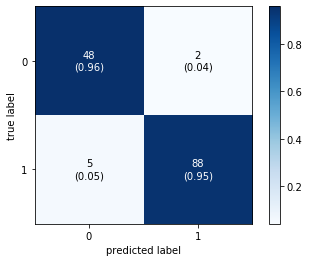

In [64]:
print(color.BLUE+' BEST CONFIGURATION ON TEST:'+color.END)
pca=PCA(n_components=5)
pca.fit(X_train_z)
X_z=pca.transform(X_train_z)
X_t_z=pca.transform(X_test_z)
pca.fit(X_train_IQR)
X_IQR=pca.transform(X_train_IQR)
X_t_IQR=pca.transform(X_test_IQR)
#pca+z
classifier=AdaBoostClassifier(**fbc33)
_,f33=test_task(X_z,y_train_z,X_t_z,y_test,classifier,disp=False)
classifier=AdaBoostClassifier(**fbc31)
_,f31=test_task(X_z,y_train_z,X_t_z,y_test,classifier,sampling='over',disp=False)
classifier=AdaBoostClassifier(**fbc32)
_,f32=test_task(X_z,y_train_z,X_t_z,y_test,classifier,sampling='under')
classifier=AdaBoostClassifier(**fbc3)
_,f3=test_task(X_z,y_train_z,X_t_z,y_test,classifier,sampling='combined',disp=False)
#pca+IQR
classifier=AdaBoostClassifier(**fbc13)
_,f13=test_task(X_IQR,y_train_IQR,X_t_IQR,y_test,classifier,disp=False)
classifier=AdaBoostClassifier(**fbc11)
_,f11=test_task(X_IQR,y_train_IQR,X_t_IQR,y_test,classifier,sampling='over',disp=False)
classifier=AdaBoostClassifier(**fbc12)
_,f12=test_task(X_IQR,y_train_IQR,X_t_IQR,y_test,classifier,sampling='under',disp=False)
classifier=AdaBoostClassifier(**fbc1)
_,f1=test_task(X_IQR,y_train_IQR,X_t_IQR,y_test,classifier,sampling='combined',disp=False)
#IQR+FS
classifier=AdaBoostClassifier(**fbc03)
_,f03=test_task(X_train_IQR_fs,y_train_IQR,X_test_IQR_fs,y_test,classifier,disp=False)
classifier=AdaBoostClassifier(**fbc01)
_,f01=test_task(X_train_IQR_fs,y_train_IQR,X_test_IQR_fs,y_test,classifier,sampling='over',disp=False)
classifier=AdaBoostClassifier(**fbc02)
_,f02=test_task(X_train_IQR_fs,y_train_IQR,X_test_IQR_fs,y_test,classifier,sampling='under',disp=False)
classifier=AdaBoostClassifier(**fbc0)
_,f0=test_task(X_train_IQR_fs,y_train_IQR,X_test_IQR_fs,y_test,classifier,sampling='combined',disp=False)
#z+FS
classifier=AdaBoostClassifier(**fbc21)
_,f23=test_task(X_train_z_fs,y_train_z,X_test_z_fs,y_test,classifier,disp=False)
classifier=AdaBoostClassifier(**fbc21)
_,f21=test_task(X_train_z_fs,y_train_z,X_test_z_fs,y_test,classifier,sampling='over',disp=False)
classifier=AdaBoostClassifier(**fbc22)
_,f22=test_task(X_train_z_fs,y_train_z,X_test_z_fs,y_test,classifier,sampling='under',disp=False)
classifier=AdaBoostClassifier(**fbc2)
_,f2=test_task(X_train_z_fs,y_train_z,X_test_z_fs,y_test,classifier,sampling='combined',disp=False)
#z-score only
classifier=AdaBoostClassifier(**fbc51)
_,f53=test_task(X_train_z,y_train_z,X_test_z,y_test,classifier,disp=False)
classifier=AdaBoostClassifier(**fbc51)
_,f51=test_task(X_train_z,y_train_z,X_test_z,y_test,classifier,sampling='over',disp=False)
classifier=AdaBoostClassifier(**fbc52)
_,f52=test_task(X_train_z,y_train_z,X_test_z,y_test,classifier,sampling='under',disp=False)
classifier=AdaBoostClassifier(**fbc5)
_,f5=test_task(X_train_z,y_train_z,X_test_z,y_test,classifier,sampling='combined',disp=False)
#IQR only
classifier=AdaBoostClassifier(**fbc41)
_,f43=test_task(X_train_IQR,y_train_IQR,X_test_IQR,y_test,classifier,disp=False)
classifier=AdaBoostClassifier(**fbc41)
_,f41=test_task(X_train_IQR,y_train_IQR,X_test_IQR,y_test,classifier,sampling='over',disp=False)
classifier=AdaBoostClassifier(**fbc42)
_,f42=test_task(X_train_IQR,y_train_IQR,X_test_IQR,y_test,classifier,sampling='under',disp=False)
classifier=AdaBoostClassifier(**fbc4)
_,f4=test_task(X_train_IQR,y_train_IQR,X_test_IQR,y_test,classifier,sampling='combined',disp=False)

d={'IQR + PCA': [f11,f12,f1,f13],'IQR + F.S.': [f01,f02,f0,f03],'Z-SCORE + PCA': [f31,f32,f3,f33],'Z-SCORE + F.S.': [f21,f22,f2,f23],'Z-SCORE':[f51,f52,f5,f53],'IQR':[f41,f42,f4,f43]}
indexes=['oversampling','undersampling','combined','no-resampling']
cols=['IQR','IQR + PCA','IQR + F.S.','Z-SCORE','Z-SCORE + PCA', 'Z-SCORE + F.S.']

### Results for all the combinations on the test set

In [65]:
pd.DataFrame(index=indexes,columns=cols,data=d )

,IQR,IQR + PCA,IQR + F.S.,Z-SCORE,Z-SCORE + PCA,Z-SCORE + F.S.
oversampling,0.967,0.954,0.972,0.984,0.956,0.972
undersampling,0.936,0.936,0.948,0.972,0.962,0.955
combined,0.972,0.936,0.955,0.950,0.950,0.972
no-resampling,0.973,0.961,0.983,0.984,0.951,0.989


The last classifier is the decision tree with the help of Adaboost.
The performance are vary near to the random forest but slightly better. So the best ensemble method is the boosting.

# Conclusions <a class="anchor" id="chapter12"></a>

The best classifier is the logistic regression both in the validation and test phase, this is a very nice result because this confirm that our validation procedure is consistent and able to correctly estimate the test error.
Also the SVM with a linear kernel has good performance and the worst classifier is the Decision tree.
It's important to notify that the advenced version of the Decision tree correctly improved the performance.
Regarding the pre-processing technique we can say that the best outliers detector for this case is the Z-score probably becouse remove less examples than the IQR and the IQR tends to augment the imbalance rate after the outliers removel.
In this dataset the pca results in the majority of the cases the best method for the dimensionality reduction but if we match the results the differance is very small, so in a real case it's better to avoid to use this technique because it removes the understandable propreties of the features as we have seen with the decision tree, and in this case we don't have a so much large number of attributes. Howerver it's very useful from the data representation point of view.
Regarding the re-sampling the over-sampling and the combined re-sampling aren't so useful and in the majority of the cases we have seen that is preferible to avoid the resampling or almost use the undersampling.

Another important point to discuss is the match between the overall validation results and the test set results. In some case for example for the logistic regression there are other combinations from the one choosen in the validation, that achieve an higher accuracy: in general we can say that the validation choose the combination able to generalize better so probably on other testing dataset the best combination choosen are better.

**This Table represent the best combination for each classifier:**
![](https://drive.google.com/uc?export=view&id=11ZUjrJz4EMUXshqGYdLIiJevFZgm4M40)

# References <a class="anchor" id="chapter13"></a>

1. [SMOTE: Synthetic Minority Over-sampling Technique N. V. Chawla, K. W. Bowyer, L. O. Hall, W. P. Kegelmeyer, 2011](https://arxiv.org/abs/1106.1813)

2. [Towards data science: metrics](https://towardsdatascience.com/metrics-to-evaluate-your-machine-learning-algorithm-f10ba6e38234)

3. [Understanding Machine learning, 2014 by Shai Shalev-Shwartz and Shai Ben-David](https://www.cs.huji.ac.il/~shais/UnderstandingMachineLearning/)

4. [UCI Dataset: Breast cancer diagnostic dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29)

5. [Wikipedia IQR](https://en.wikipedia.org/wiki/Interquartile_range)

6. Plotly documentation

7. Sklearn documentation

8. Slide from Mathematics in Machine Learning, Francesco Vaccarino, Mauro Gasparini

9. Slide from Machine learning and Deep Learning course, Barbara Caputo

10. Imblearn documentation

